<h1 style="text-align: center; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 60px;">Predicting Apartments Prices in Buenos Aires, Argentina</h1>


<div style="width: 90%; font-family: Times New Roman, serif; text-justify: inter-word; margin: 0 auto; font-size: 20px;">

## **Introduction**
### **Motivation**
The real estate market in ***Buenos Aires*** is influenced by various factors such as economic conditions, population growth, and urban development. Predicting house prices accurately is essential for various stakeholders, including buyers, sellers, real estate agents, and policy makers. Accurate price predictions can help in making informed decisions, optimizing investments, and planning sustainable urban development.


### **Objective**
We aim to develop a reliable model to predict apartment prices in Buenos Aires using available data, despite the absence of temporal indicators. 

## **Table of Contents**
1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Data Description](#data-description)
4. [Methodology](#methodology)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
6. [Data preparation (preprocessing)](#data-preparation-preprocessing)
7. [Modeling](#modeling)
8. [Reverse Heteroskedasticity](#reverse-heteroskedasticity)
9. [Final Model: Gradient Boosting Regressor](#final-model-gradient-boosting-regressor)
10. [Store Model](#store-model)
11. [Deployment](#deployment)	
12. [Conclusion](#conclusion)
13. [References](#references)
14. [About the Author](#about-the-author)

## **Problem Statement**

Identify the significant features that accurately predict apartment prices in Buenos Aires for units costing less than $400,000 USD using a suitable regression model. Aim to achieve a mean absolute error (MAE) of less than 50% compared to the baseline model, using a dataset of 4,000+ apartment listings.

## **Data Description**

### **Data Sources**
The dataset for this project is sourced from websites that provide real estate services in Buenos Aires. It includes 12,000+ house listings from Buenos Aires, containing various features relevant to housing prices. The data was scraped to ensure comprehensive and up-to-date information, capturing the unique characteristics of the local real estate market.

### **Data Overview**

The dataset consists of over 43,000 listings with 14 features. Below is a description of each feature:

- **operation**: Type of operation (e.g., sale, rent).
- **property_type**: Type of property (e.g., house, apartment, PH (Propiedad Horizontal), Store).
- **place_with_parent_names**: The location of the property, including parent regions for context.
- **lat-lon**: Latitude and longitude coordinates of the property.
- **price**: The listed price of the property.
- **currency**: The currency of the listed price (e.g., USD, ARS).
- **price_aprox_local_currency**: Approximate price in the local currency.
- **price_aprox_usd**: Approximate price in USD.
- **surface_total_in_m2**: Total surface area of the property in square meters.
- **surface_covered_in_m2**: Covered surface area of the property in square meters.
- **price_usd_per_m2**: Price per square meter in USD.
- **price_per_m2**: Price per square meter in the listed currency.
- **floor**: The floor number of the property (if applicable).
- **rooms**: The number of rooms in the property.
- **expenses**: Expenses associated with the property.
- **properati_url**: URL of the property listing on the Properati website.


## **Methodology**

This project follows a prescriptive methodology to predict apartment prices in Buenos Aires, starting with defining the objective of identifying significant features using a suitable regression model. Key metrics were set, including achieving a mean absolute error (MAE) of less than 50% compared to a baseline model. 

The data, scraped from real estate websites, was cleaned by handling missing values, converting data types, removing duplicates, and normalizing features. Exploratory Data Analysis (EDA) was conducted to understand feature distributions and relationships.

Feature engineering was used at each step to identify the most significant features in our model. 

</div>

<div style="font-family: 'Times New Roman', serif; ">

## **Exploratory Data Analysis (EDA)**

We thoroughly examine the data to determine the preprocessing steps that come after.

### **Import Libraries**

</div>

In [1]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import missingno as msno
import scipy.stats as sps

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

warnings.simplefilter(action="ignore", category=FutureWarning)


<div style="font-family: 'Times New Roman', serif;">

### **Import Data**
</div>


In [2]:
# Read and Convert the CSV file into a Pandas DataFrame
df_buenos_aires = pd.read_csv('data/buenos-aires-real-estate.csv', low_memory=False)	

<div style="font-family: 'Times New Roman', serif;">

### **Investigate Data**

</div>

In [3]:
df_buenos_aires.info()	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43029 entries, 0 to 43028
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   43029 non-null  object 
 1   property_type               43029 non-null  object 
 2   place_with_parent_names     43029 non-null  object 
 3   lat-lon                     34734 non-null  object 
 4   price                       38073 non-null  float64
 5   currency                    38072 non-null  object 
 6   price_aprox_local_currency  38073 non-null  float64
 7   price_aprox_usd             38073 non-null  float64
 8   surface_total_in_m2         29871 non-null  float64
 9   surface_covered_in_m2       36420 non-null  float64
 10  price_usd_per_m2            24449 non-null  float64
 11  price_per_m2                32642 non-null  float64
 12  floor                       6505 non-null   float64
 13  rooms                       238

<div style="font-family: 'Times New Roman', serif;">

The output of the method *info()* provides many information. For instance, we clearly observe that the data is not complete and missing values are prevalent is some columns. In addition, both columns `expenses` and `lat-lon` should not be of type *object*. 

#### **Missing Values**

</div>

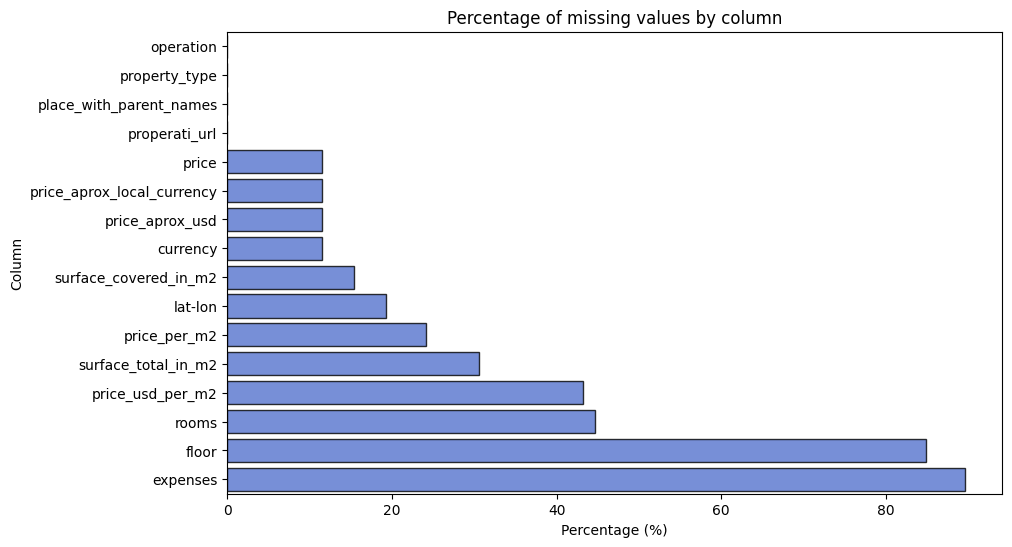

In [4]:
# Percentage of missing values by column
nan_columns_percentage = (df_buenos_aires.isna().sum(axis=0) * 100 / len(df_buenos_aires)).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=nan_columns_percentage, y=nan_columns_percentage.index, orient='h', 
            color='royalblue', alpha=0.8, edgecolor='black')
plt.title('Percentage of missing values by column')
plt.xlabel('Percentage (%)')
plt.ylabel('Column')

plt.show()

<div style="font-family: 'Times New Roman', serif;">

Features like `expenses` and `floor` have more than 50% of missing values, which informs our decision to just drop them, because no matter what filling strategy we use, we are prone to influence our predictive model and therefore affect accuracy. 

</div>

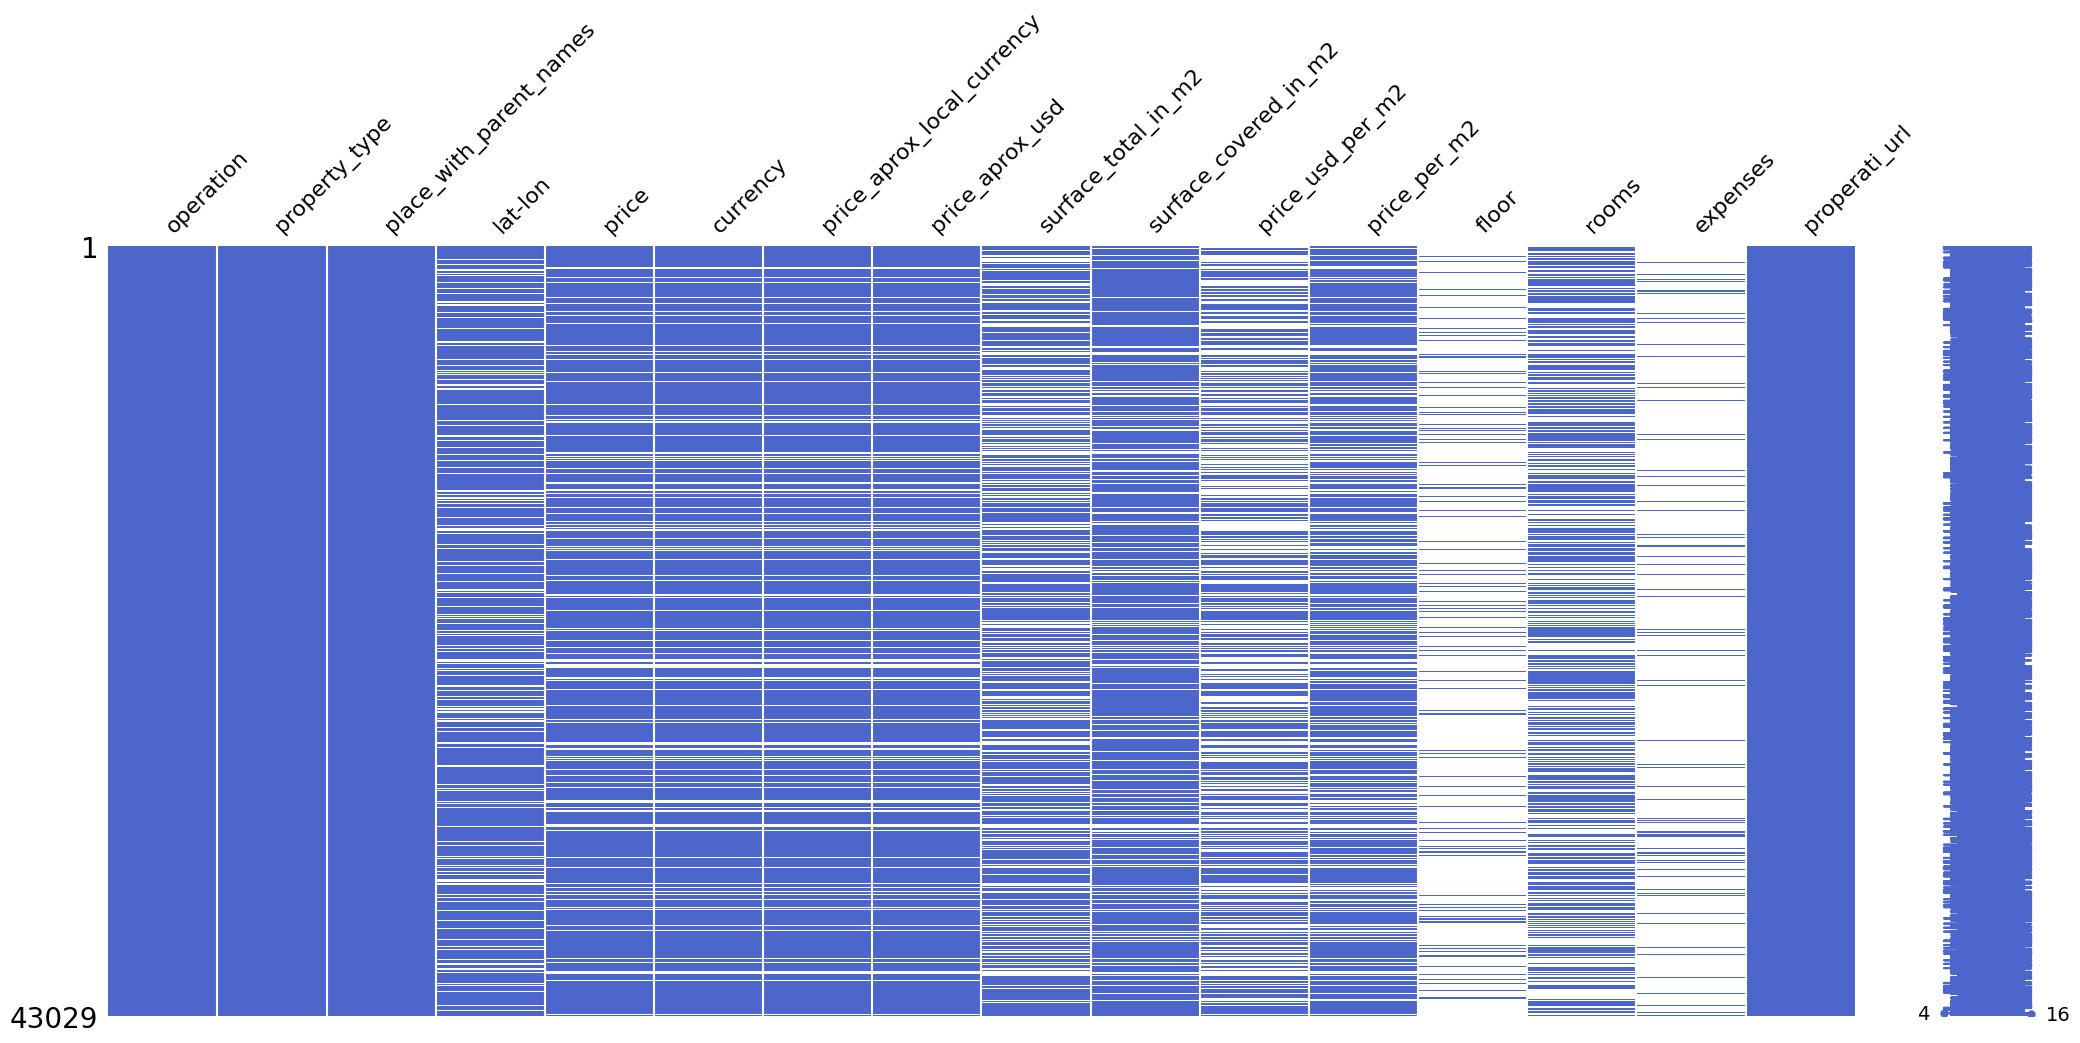

In [5]:
# Plot missing values with color royalblue
msno.matrix(df_buenos_aires, color=(0.3, 0.4, 0.8));

<div style="font-family: 'Times New Roman', serif;">

The missing value matrix provide us with many information in a clear and concise way. We can observe that whenever `price` is missing, `currency`, `price_aprox_local_currency`, and `price_aprox_usd` are also missing. Which suggests an association between them.

The `expenses` column is the one with the most missing values, followed by the `floor` and `rooms` and then `price_usd_per_m2`.

#### **Describe Data**

</div>

In [6]:
# Describe the dataset
df_buenos_aires.describe(include='all').T

count unique  \
operation                     43029      1   
property_type                 43029      4   
place_with_parent_names       43029    499   
lat-lon                       34734  25747   
price                       38073.0    NaN   
currency                      38072      2   
price_aprox_local_currency  38073.0    NaN   
price_aprox_usd             38073.0    NaN   
surface_total_in_m2         29871.0    NaN   
surface_covered_in_m2       36420.0    NaN   
price_usd_per_m2            24449.0    NaN   
price_per_m2                32642.0    NaN   
floor                        6505.0    NaN   
rooms                       23806.0    NaN   
expenses                       4452    665   
properati_url                 43029  43029   

                                                                          top  \
operation                                                                sell   
property_type                                                       apartment   
place_with_parent_names     |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...   
lat-lon                                               -34.6036844,-58.3815591   
price                                                                     NaN   
currency                                                                  USD   
price_aprox_local_currency                                                NaN   
price_aprox_usd                                                           NaN   
surface_total_in_m2                                                       NaN   
surface_covered_in_m2                                                     NaN   
price_usd_per_m2                                                          NaN   
price_per_m2                                                              NaN   
floor                                                                     NaN   
rooms                                                                     NaN   
expenses                                                                  1.0   
properati_url               http://villa-crespo.properati.com.ar/12egq_ven...   

                             freq            mean             std       min  \
operation                   43029             NaN             NaN       NaN   
property_type               23228             NaN             NaN       NaN   
place_with_parent_names      2370             NaN             NaN       NaN   
lat-lon                       273             NaN             NaN       NaN   
price                         NaN   295966.139022   494038.646861       0.0   
currency                    36394             NaN             NaN       NaN   
price_aprox_local_currency    NaN  3537120.877904  4781742.269271       0.0   
price_aprox_usd               NaN   233282.387897   315368.429086       0.0   
surface_total_in_m2           NaN      269.157578     1686.328201       0.0   
surface_covered_in_m2         NaN      244.493904    10371.179349       0.0   
price_usd_per_m2              NaN     1718.387879     1497.571317       0.0   
price_per_m2                  NaN     3737.943768    11657.891695  0.056686   
floor                         NaN         10.7897       79.735358       1.0   
rooms                         NaN        3.058305        1.412714       1.0   
expenses                      188             NaN             NaN       NaN   
properati_url                   1             NaN             NaN       NaN   

                                    25%          50%          75%          max  
operation                           NaN          NaN          NaN          NaN  
property_type                       NaN          NaN          NaN          NaN  
place_with_parent_names             NaN          NaN          NaN          NaN  
lat-lon                             NaN          NaN          NaN          NaN  
price                           95000.0     155000.0     295000.0   15000000.0  
currency                            NaN

<div style="font-family: 'Times New Roman', serif;">

The method `describe()` provide a descriptive analysis of our data. We can observe that `price`, `price_aprox_local_currency`, `price_aprox_usd`, `surface_total_in_m2`, `surface_covered_in_m2`, and `price_usd_per_m2` show a minimum value of **0.0** which is not likely in our case. On the other hand, having a **987897.0 $m^2$** in the `surface_covered_in_m2` is exaggerated and could be a sign for an outlier.

These columns may have outliers we should deal with later.

#### **Histograms and boxplots**
In this analysis, we focus on the surface covered feature, which represents the total indoor living area of a property, including all enclosed spaces such as rooms, hallways, bathrooms, and kitchens. 

This metric is particularly important from the perspective of homebuyer considerations, as it directly impacts the usability and comfort of the living space. Homebuyers often prioritize the amount of indoor space available for daily activities, family gatherings, and personal comfort. 

By analyzing the surface covered, we can provide more accurate insights into the value and livability of apartments, helping potential buyers make informed decisions based on the actual indoor area they will be utilizing. This focus ensures that our model aligns with the key factors that homebuyers consider when evaluating properties.

</div>

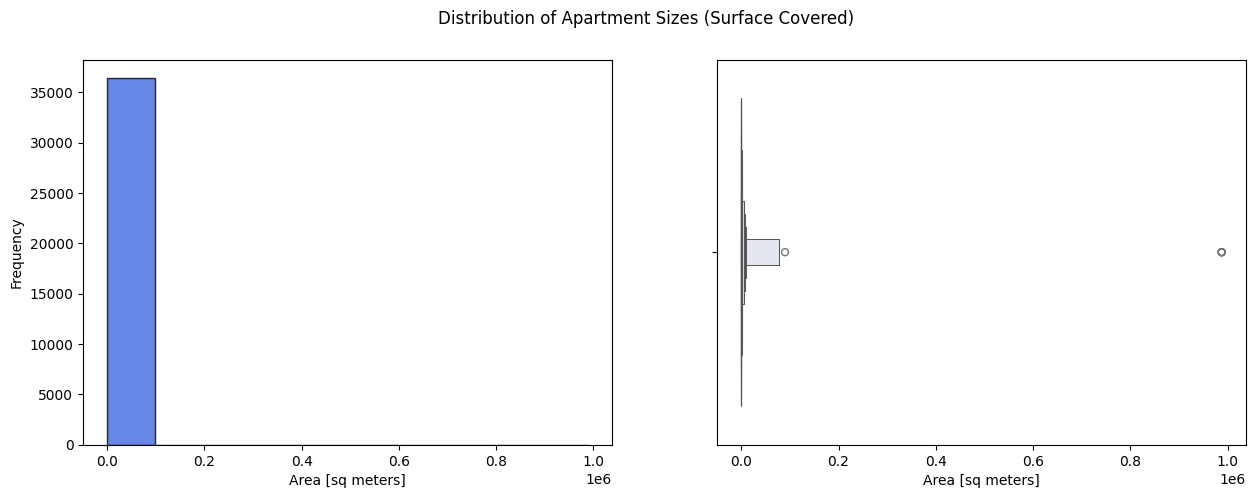

In [7]:
# Plot distribution of apartment sizes 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of surface covered
df_buenos_aires.surface_covered_in_m2.plot(kind='hist', color='royalblue', alpha=0.8, edgecolor='black', ax=ax1)

# Boxplot of surface covered 
#df_buenos_aires.surface_covered_in_m2.plot(kind='box', color='royalblue', vert=False, rot=90, ax=ax2)	
sns.boxenplot(data=df_buenos_aires, x='surface_covered_in_m2', color='royalblue', ax=ax2, scale='linear')

ax1.set_xlabel('Area [sq meters]')
ax2.set_xlabel('Area [sq meters]')
fig.suptitle('Distribution of Apartment Sizes (Surface Covered)')
plt.show()

<div style=" font-family: 'Times New Roman', serif;">
Apparently, most of our listings have an Area of no more than 100,000 $m^2$. The boxplot confirms the existence of outliers.

</div>

In [8]:
df_buenos_aires.surface_covered_in_m2.describe().to_frame()

surface_covered_in_m2
count           36420.000000
mean              244.493904
std             10371.179349
min                 0.000000
25%                46.000000
50%                76.000000
75%               160.000000
max            987897.000000

<div style="font-family: 'Times New Roman', serif;">

Based on the Histogram the boxplot and the descibe method for the `surface_covered_in_m2` column, we conclude that there are outliers in the data. The strategy chosen in this analysis is to drop them and we will use the *quantile strategy*, the quantiles are to be set after exploring the data.

### **Quantile Strategy**

#### **Quantile Categorization**

</div>

In [9]:
def get_quantile_category(df, column, quantile_range):
    """
    Categorize the data into quantile categories and return a DataFrame
    with the quantile category, count, min, and max per quantile category.
    
    Args: 
        df: Pandas DataFrame
        column: Column to categorize
        quantiles: List of quantiles
    
    Returns:
        agg_df: Pandas DataFrame with quantile categories, count, min, and max
    """

    quantiles = df[column].quantile(quantile_range)

    # Categorize the data
    n = len(quantiles.unique())
    labels = quantile_range[1:n]

    categories = pd.cut(df[column], bins=quantiles.values, labels=labels, include_lowest=True, retbins=False, right=True, duplicates='drop')
    categories = categories.rename('quantile_category')
    df_quantile = pd.concat([df, categories], axis=1)
    
    # Calculate the count, min, and max for each quantile category
    agg_df = df_quantile.groupby('quantile_category')[column].agg(['count', 'min', 'max']).reset_index()
    
    return agg_df

In [10]:
quantile_range = np.linspace(0, 1, 30).round(2) # 29 quantiles
df_quantiles_min_max = get_quantile_category(df_buenos_aires, 'surface_covered_in_m2', quantile_range)
df_quantiles_min_max

quantile_category  count    min       max
0               0.03   1480    0.0      20.0
1               0.07   1196   21.0      30.0
2               0.10   1146   31.0      34.0
3               0.14   1653   35.0      38.0
4               0.17   1170   39.0      40.0
5               0.21   1266   41.0      43.0
6               0.24   1140   44.0      45.0
7               0.28   1150   46.0      48.0
8               0.31   1139   49.0      50.0
9               0.34   1551   51.0      55.0
10              0.38   1675   56.0      60.0
11              0.41    383   61.0      62.0
12              0.45   1500   63.0      69.0
13              0.48   1170   70.0      73.0
14              0.52   1660   74.0      80.0
15              0.55    779   81.0      85.0
16              0.59   1443   86.0      95.0
17              0.62   1115   96.0     102.0
18              0.66   1947  103.0     120.0
19              0.69    796  121.0     130.0
20              0.72    973  131.0     145.0
21              0.76   1363  146.0     164.0
22              0.79   1166  165.0     180.0
23              0.83   1376  181.0     205.0
24              0.86   1107  206.0     232.0
25              0.90   1434  233.0     277.0
26              0.93   1111  278.0     320.0
27              0.97   1519  321.0     450.0
28              1.00   1012  451.0  987897.0

<div style="font-family: 'Times New Roman', serif;">

Based on the results of the quantile table, we can see that the **10% of the smallest values** are **<= 34** sq meters and the *2*% of the largest values** are **>= 500** sq meters.

We can observe clearly that the sudden jump after the **98th percentile** is big compared to the rest of the data. That's why we decided to drop these outliers.
</div>

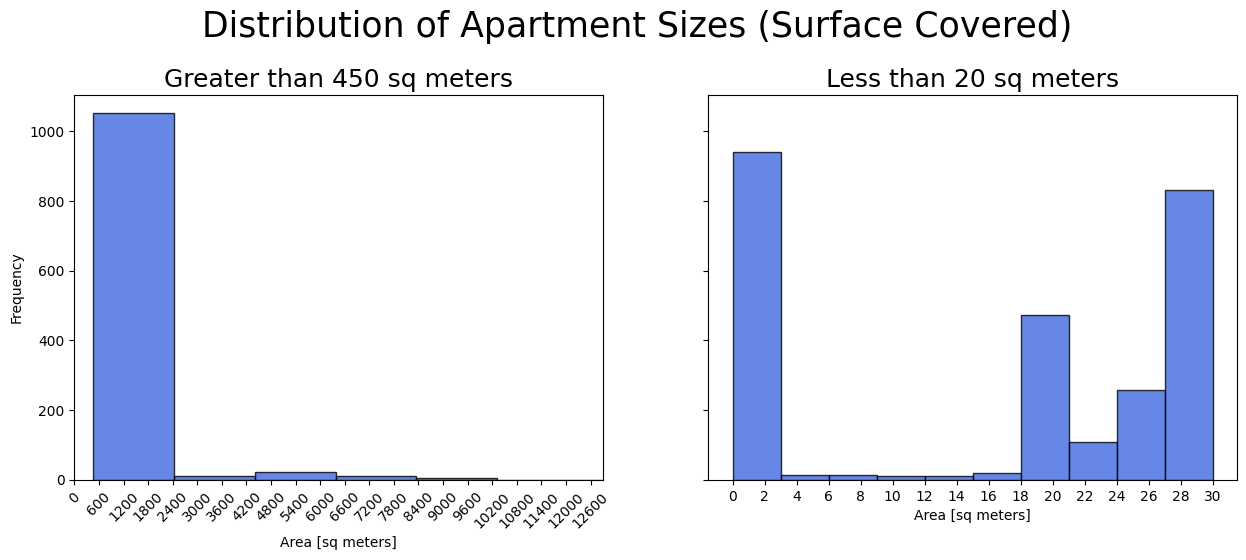

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot distribution of apartment sizes greater than 450 sq meters 
(df_buenos_aires[df_buenos_aires.surface_covered_in_m2 >= 450]
 .surface_covered_in_m2
 .plot(kind='hist', edgecolor='black', color='royalblue', bins=500, alpha=0.8, ax=ax1, xticks=range(0, 12_900, 600), xlim=(0, 12_900), rot=45))

# Plot distribution of apartment sizes less than 20 sq meters
(df_buenos_aires[df_buenos_aires.surface_covered_in_m2 <= 30]
 .surface_covered_in_m2
 .plot(kind='hist', edgecolor='black', color='royalblue', alpha=0.8, ax=ax2, xticks=range(0, 31, 2)))

ax1.set_xlabel('Area [sq meters]')
ax2.set_xlabel('Area [sq meters]')

plt.suptitle('Distribution of Apartment Sizes (Surface Covered)', y=1.05, size=25)

ax1.set_title('\nGreater than 450 sq meters', size=18)
ax2.set_title('\nLess than 20 sq meters', size=18)
plt.show()

<div style="font-family: 'Times New Roman', serif;">

The histogram on the right tells us that more than 900 observations have an area less then 3 sq meters, which is not expected. Additionally, we can see that there are about 400 observations with an area between 18 and 21 sq meters. 

Similarly, the histogram on the left tells us that there are more than 1,000 observations with an area greater than 450 and less than 2,400 sq meters. 
The histograms confirm what we expected, therefore we will proceed with the chosen quantile strategy.

**NOTE:** The scale of the x-axis in the left histogram starts at 450 sq meters and ends at 125,000 sq meters.

#### **Remove Outliers (quantile strategy)**

</div>

In [12]:

def remove_outliers(df, column, q_a, q_b):
    """
    Remove outliers using the percentiles
    Args: 
        df: Pandas DataFrame
        column: Column to remove outliers   
    Returns:
        df: Pandas DataFrame with outliers removed
    """
    qa_ = df[column].quantile(q_a)
    qb_ = df[column].quantile(q_b)
    return df[(df[column].between(qa_, qb_, inclusive='both'))]

In [13]:
# Calculate quantiles;
q1, q2 = 	df_buenos_aires.surface_covered_in_m2.quantile([0.10, 0.98])
print(f'The 10th and 98th percentile are {q1: .2f} and {q2: .2f} respectively')

The 10th and 98th percentile are  34.00 and  500.00 respectively


In [14]:
# Plot distribution of apartment sizes after removing outliers
remove_outliers(df_buenos_aires, 'surface_covered_in_m2', 0.1, 0.9).surface_covered_in_m2.describe().to_frame() # type: ignore

surface_covered_in_m2
count           29247.000000
mean               99.070366
std                61.888812
min                34.000000
25%                50.000000
50%                75.000000
75%               134.000000
max               277.000000

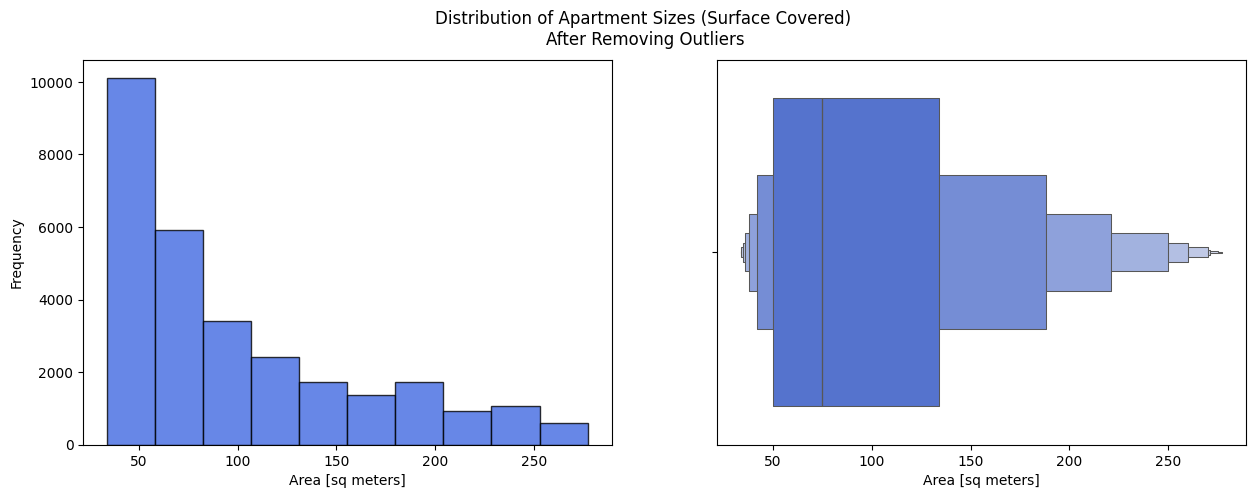

In [15]:
# Plot distribution of apartment sizes after removing outliers	
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of surface covered
remove_outliers(df_buenos_aires, 'surface_covered_in_m2', 0.1, 0.9).surface_covered_in_m2.plot(kind='hist', color='royalblue', alpha=0.8, edgecolor='black', ax=ax1)

# Boxen plot of surface covered, you can choose the width method to be either `linear` or `exponential`
sns.boxenplot(data=remove_outliers(df_buenos_aires, 'surface_covered_in_m2', 0.1, 0.9), x='surface_covered_in_m2', color='royalblue', ax=ax2, width_method='exponential')

ax1.set_xlabel('Area [sq meters]')
ax2.set_xlabel('Area [sq meters]')
plt.suptitle('Distribution of Apartment Sizes (Surface Covered) \nAfter Removing Outliers')
plt.show()

<div style="font-family: 'Times New Roman', serif;">
Now the distribution of apartment sizes looks much more natural with the outliers removed.

The histogram is right skewed, which is expected. As less and less apartments have larger surface area. 

The `boxenplot` in the right, shows the distribution of quantiles for the `surface_covered_in_m2` column. Each successive level outward contains half of the remaining data. So the first two sections out from the centerline contain 50% of the data. After that, the next two sections contain 25% of the data. This continues until we are at the outlier level. Each level out is shaded lighter.

We observe that the right side of each level contains more data than the left side. This further confirms what we expected.

Following the same approach, we can remove outliers from the `surface_total_in_m2` column. We will use the same quantile strategy, since the two features are closely related.

</div>

In [16]:
get_quantile_category(df_buenos_aires, 'surface_total_in_m2', quantile_range)

quantile_category  count     min       max
0               0.03   2996     0.0      14.0
1               0.07   1234    15.0      34.0
2               0.10    939    35.0      38.0
3               0.14   1319    39.0      43.0
4               0.17    801    44.0      46.0
5               0.21   1114    47.0      50.0
6               0.24   1206    51.0      55.0
7               0.28    573    56.0      58.0
8               0.31   1331    59.0      65.0
9               0.34    909    66.0      70.0
10              0.38   1115    71.0      78.0
11              0.41    908    79.0      85.0
12              0.45   1122    86.0      98.0
13              0.48    895    99.0     108.0
14              0.52   1182   109.0     127.0
15              0.55    895   128.0     146.0
16              0.59   1185   147.0     174.0
17              0.62   1252   175.0     200.0
18              0.66    647   201.0     220.0
19              0.69   1084   221.0     253.0
20              0.72   1252   254.0     300.0
21              0.76    838   301.0     350.0
22              0.79    925   351.0     420.0
23              0.83   1264   421.0     600.0
24              0.86    916   601.0     800.0
25              0.90   1072   801.0    1134.0
26              0.93    897  1135.0  192014.0

In [17]:
remove_outliers(df_buenos_aires, 'surface_total_in_m2', 0.2, 0.9).surface_total_in_m2.describe().to_frame() # type: ignore

surface_total_in_m2
count         21021.000000
mean            162.711860
std             129.989402
min              42.000000
25%              64.000000
50%             109.000000
75%             225.000000
max             600.000000

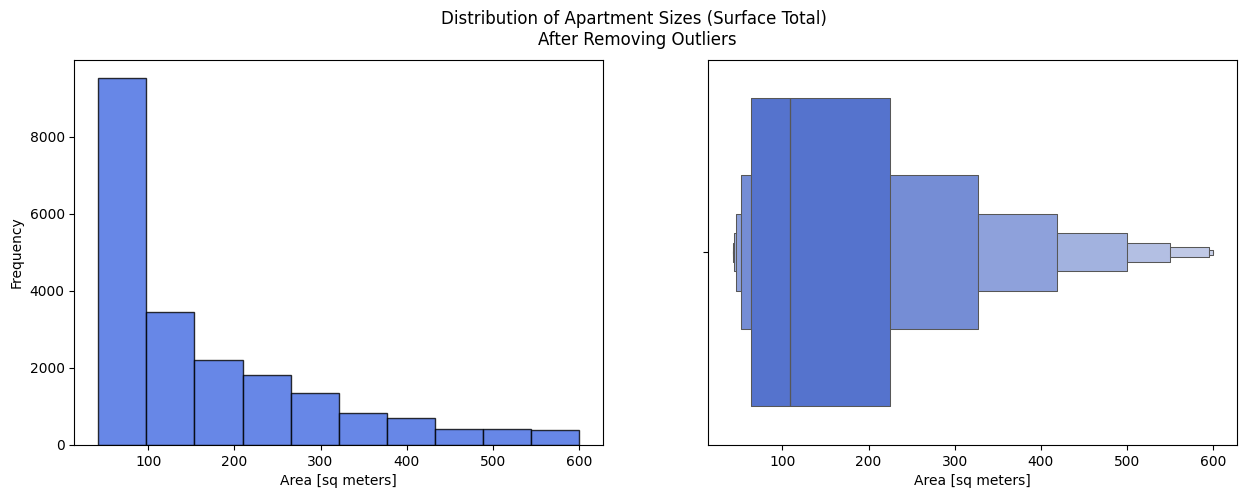

In [18]:
# Plot distribution of apartment sizes (Surface Total) after removing outliers	
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of surface covered
remove_outliers(df_buenos_aires, 'surface_total_in_m2', 0.2, 0.9).surface_total_in_m2.plot(kind='hist', color='royalblue', alpha=0.8, edgecolor='black', ax=ax1)

# Boxen plot of surface covered 
sns.boxenplot(data=remove_outliers(df_buenos_aires, 'surface_total_in_m2', 0.2, 0.9), x='surface_total_in_m2', color='royalblue', ax=ax2, width_method='exponential')

ax1.set_xlabel('Area [sq meters]')
ax2.set_xlabel('Area [sq meters]')
plt.suptitle('Distribution of Apartment Sizes (Surface Total) \nAfter Removing Outliers')
plt.show()

<div style="font-family: 'Times New Roman', serif;">
Again, following the same approach, we can remove outliers from the `rooms` column. We will use the same quantile strategy. 

</div>

In [19]:
get_quantile_category(df_buenos_aires, 'rooms', quantile_range)

quantile_category  count  min   max
0              0.03   9178  1.0   2.0
1              0.07   6633  3.0   3.0
2              0.10   4878  4.0   4.0
3              0.14   2015  5.0   5.0
4              0.17    683  6.0   6.0
5              0.21    419  7.0  32.0

In [20]:
df_buenos_aires.rooms.describe().to_frame()

rooms
count  23806.000000
mean       3.058305
std        1.412714
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       32.000000

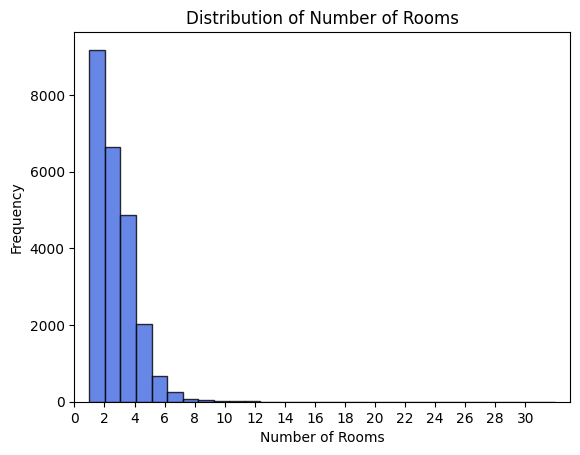

In [21]:
df_buenos_aires.rooms.plot(kind='hist', edgecolor='black', color='royalblue', bins=30, alpha=0.8, xticks=range(0, 32, 2), xlim=(0, 33))	
plt.xlabel('Number of Rooms')
plt.title('Distribution of Number of Rooms')
plt.show()

<div style="font-family: 'Times New Roman', serif;">
It looks like most of our apartments have between 1 and 7 rooms. Only few apartments have more than 7 rooms, and again this was expected.

Moving on, we will explore the distribution of `price_aprox_usd` using the approach as before.

</div>

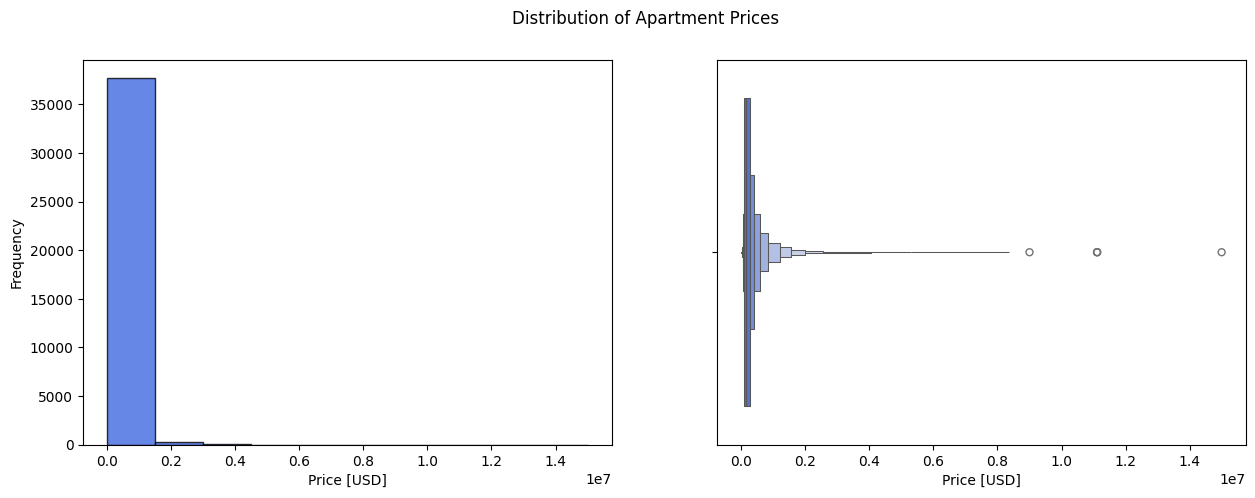

In [22]:
# Plot distribution of apartment prices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of surface covered
df_buenos_aires.price_aprox_usd.plot(kind='hist', color='royalblue', alpha=0.8, edgecolor='black', ax=ax1)

# Boxen plot of surface covered 
sns.boxenplot(data=df_buenos_aires, x='price_aprox_usd', color='royalblue', ax=ax2, scale='exponential')

ax1.set_xlabel('Price [USD]')
ax2.set_xlabel('Price [USD]')
plt.suptitle('Distribution of Apartment Prices')
plt.show()

<div style="font-family: 'Times New Roman', serif;">
We can see that most of our listings have an approximate price of less than $800,000. The `boxenplot` confirms the existence of outliers.

</div>

In [23]:
price_quantile_range = np.linspace(0, 1, 90).round(2)
get_quantile_category(df_buenos_aires, 'price_aprox_usd', price_quantile_range)

quantile_category  count         min          max
0               0.01    384        0.00     38804.04
1               0.02    381    38805.61     45381.00
2               0.03    440    45500.00     50000.00
3               0.04    565    50313.72     55000.00
4               0.06    736    55246.43     60000.00
..               ...    ...         ...          ...
82              0.93    720   623187.00    765000.00
83              0.94    381   765450.00    875000.00
84              0.96    421   880000.00   1100000.00
85              0.97    349  1111111.00   1450000.00
86              0.98    371  1460000.00  15000000.00

[87 rows x 4 columns]

In [24]:
remove_outliers(df_buenos_aires, 'price_aprox_usd', 0.1, 0.9).price_aprox_usd.describe().to_frame() # type: ignore

price_aprox_usd
count     30620.000000
mean     175206.359275
std       95436.052993
min       68000.000000
25%       98000.000000
50%      145000.000000
75%      230000.000000
max      450000.000000

<div style="font-family: 'Times New Roman', serif;">

We will use the 1st and the 97th quantile to remove outliers. There's a sudden jump in the prices of appartments after the 97th quantile, if left out it would affect the distribution of prices and thus our predictive model.

</div>

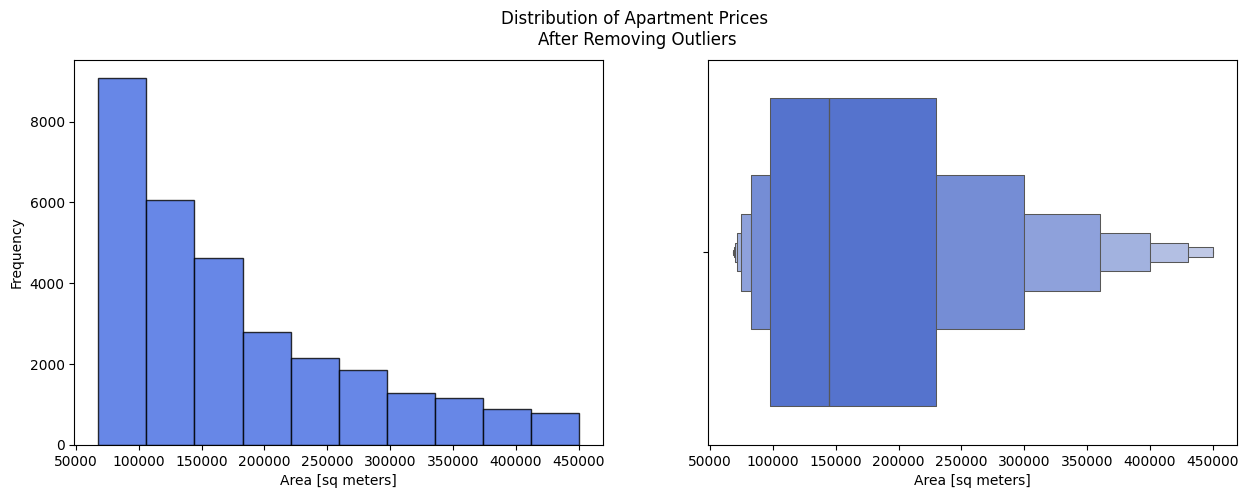

In [25]:
# Plot distribution of apartment prices after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of surface covered
remove_outliers(df_buenos_aires, 'price_aprox_usd', 0.1, 0.9).price_aprox_usd.plot(kind='hist', color='royalblue', alpha=0.8, edgecolor='black', ax=ax1)

# Boxen plot of surface covered 
sns.boxenplot(data=remove_outliers(df_buenos_aires, 'price_aprox_usd', 0.1, 0.9), x='price_aprox_usd', color='royalblue', ax=ax2, scale='exponential')

ax1.set_xlabel('Area [sq meters]')
ax2.set_xlabel('Area [sq meters]')
plt.suptitle('Distribution of Apartment Prices \nAfter Removing Outliers')
plt.show()

<div style="font-family: 'Times New Roman', serif;">

### **Data Exploration**
#### **Analysis of correlation**

</div>

In [26]:
# Select only numerical columns
numerical_columns = df_buenos_aires.select_dtypes(include='number').columns

In [27]:
# Correlation matrix between numerical columns
corr_df = df_buenos_aires[numerical_columns].corr()  # type: ignore	

# Mask the upper triangle of the correlation matrix
mask_corr = np.triu(np.ones_like(corr_df, dtype=bool))

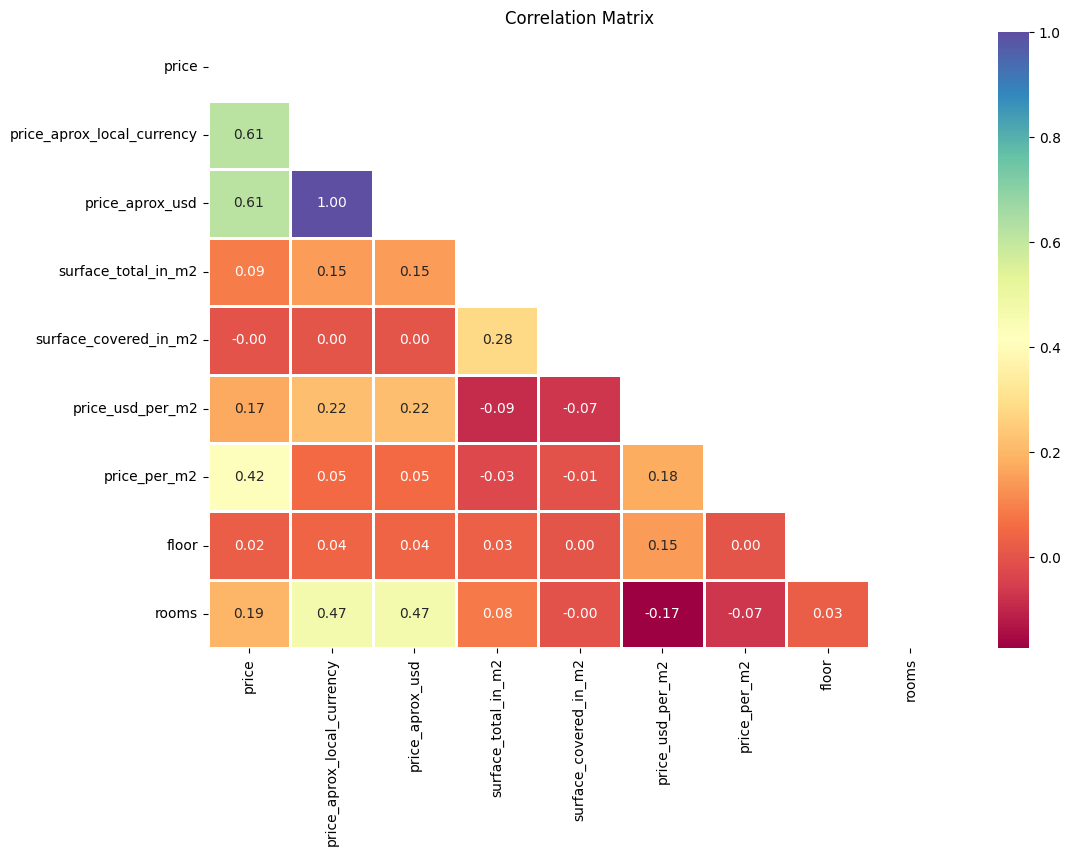

In [28]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr_df, annot = True, cmap = "Spectral", linewidths = 2, linecolor = "white", fmt='.2f', mask=mask_corr)
plt.title("Correlation Matrix")
plt.show()

<div style="font-family: 'Times New Roman', serif;">

The first thing we notice from this correlation matrix is that `price_aprox_usd` and `price_aprox_local_currency` are perfectly correlated, which is expected because we can get `price_aprox_usd` from `price_aprox_local_currency` and exchange rate. 

The second thing we notice is that `price_aprox_local_currency` and `price_aprox_usd` are somewhat moderately correlated with `rooms`. This suggests that the higher the number of rooms, the higher the price.

The third thing we notice is that `price_aprox_local_currency` and `price_aprox_usd` are moderately correlated with `price`. 

The fourth thing we notice is that `price_usd_per_m2` and `rooms` have a weakly negative correlation. Which is not expected. 
`price`, `price_aprox_local_currency`, and `price_aprox_usd` can present high **co-linearity**, and thus affect the accuracy of our predictive model. We'll have to only keep one of them, we choose `price_aprox_usd` for our model.

</div>

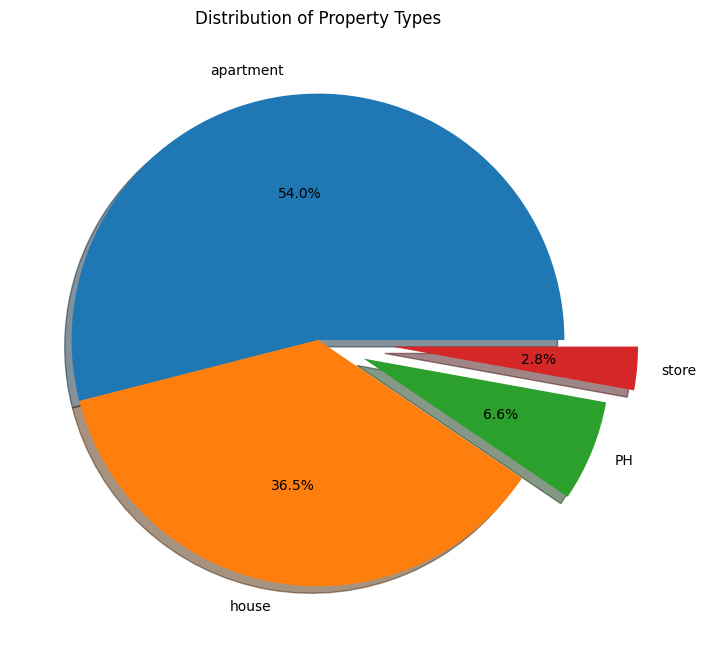

In [29]:
# Plot distribution of property types
plt.figure(figsize=(8, 8))
df_buenos_aires.property_type.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0, 0, 0.2, 0.3])
plt.ylabel('')
plt.title('Distribution of Property Types')
plt.show()

<div style="font-family: 'Times New Roman', serif;">

We can see that most of our listings are of `apartment` type and `house` type representing around 90% of our data.  

We should consider filtering our data to only include one type of property in our model to avoid inaccuracy.

#### **Investigate Data time period**

We will try to investigate the data period of the dataset. We will use the `price_aprox_local_currency` and `price_aprox_usd` to find the exchange rate and then **reverse-engineer** that information with the help of public exchange rates to find precisely when the data was collected.

</div>

In [30]:
# Calculate exchange rate between local currency and USD
(df_buenos_aires.price_aprox_local_currency / df_buenos_aires.price_aprox_usd).round(5).unique()[0]

15.1624

<div style="font-family: 'Times New Roman', serif;">

We found that the exchange rate was 15.1624, and by referencing the public exchange rates, we conclude that the data was collected between **Sepetember** and	**October 2016**. 

#### **Investigate currency**

We will drop all the NaN values based on the `price` column.

</div>

In [31]:
# Drop NaN Values.
df_buenos_aires = df_buenos_aires[~df_buenos_aires.price.isna()]

<div style="font-family: 'Times New Roman', serif;">

We will drop observations that have `price` equal to `0.0`.

</div>

In [32]:
# Drop rows where price is equal to 0
df_buenos_aires = df_buenos_aires[df_buenos_aires.price != 0.0]

<div style="font-family: 'Times New Roman', serif;">

Now will invistigate prices that have a `USD` currency and have a different value from the one shown in the column `price_aprox_usd`

</div>

In [33]:
# Check if price_aprox_usd is not equal to price when currency is USD
df_buenos_aires[(df_buenos_aires.price != df_buenos_aires.price_aprox_usd) & (df_buenos_aires.currency == 'USD')].shape[0]

0

<div style="font-family: 'Times New Roman', serif;">

#### **Investigate price_usd_per_m2 and price_aprox_usd**

We will investigate the relationship between `price_usd_per_m2`, and `price_aprox_usd`.

It seems that the `price_usd_per_m2` can be derived from the `price_aprox_usd` and `surface_covered_in_m2`.
Similarly, the `price_per_m2` can be derived from the `price_aprox_local_currency` and `surface_total_in_m2`.

</div>

In [34]:
pd.options.display.float_format = '{:.2f}'.format

# we can get price_usd_per_m2 by dividing price_aprox_usd by surface_total_in_m2
(df_buenos_aires.price_usd_per_m2
- df_buenos_aires.price_aprox_usd
/ df_buenos_aires.surface_total_in_m2)

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
43024    0.00
43025     NaN
43026   -0.00
43027     NaN
43028    0.00
Length: 38064, dtype: float64

In [35]:
(df_buenos_aires.price_usd_per_m2
- df_buenos_aires.price_aprox_usd
/ df_buenos_aires.surface_total_in_m2).describe().to_frame()

0
count 24446.00
mean      0.00
std       0.00
min      -0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00

<div style="font-family: 'Times New Roman', serif;">

#### **Investigate place_with_parent_names**

In this part, we will extract the country, province, municipality, and neighborhood from the `place_with_parent_names` column. 

</div>

In [36]:
df_buenos_aires.place_with_parent_names.str.split('|', expand=True)


0           1                         2                   3  \
0         Argentina           Capital Federal        Villa Crespo   
1         Argentina  Bs.As. G.B.A. Zona Oeste          La Matanza   
2         Argentina  Bs.As. G.B.A. Zona Oeste               Morón   
3         Argentina  Bs.As. G.B.A. Zona Oeste     Tres de Febrero   
4         Argentina           Capital Federal           Chacarita   
...   ..        ...                       ...                 ...   
43024     Argentina  Bs.As. G.B.A. Zona Norte        San Fernando   
43025     Argentina  Bs.As. G.B.A. Zona Norte       Vicente López   
43026     Argentina           Capital Federal            Belgrano   
43027     Argentina  Bs.As. G.B.A. Zona Norte  General San Martín   
43028     Argentina           Capital Federal        Barrio Norte   

                 4     5     6  
0                   None  None  
1      Ramos Mejía        None  
2         Castelar        None  
3                   None  None  
4                   None  None  
...            ...   ...   ...  
43024     Victoria        None  
43025      Florida        None  
43026               None  None  
43027   San Martín        None  
43028               None  None  

[38064 rows x 7 columns]

In [37]:
# Split the `place_with_parent_names` column into multiple columns
df_localities = df_buenos_aires.place_with_parent_names.str.split('|', expand=True)

# Drop columns 0, 5, 6
df_localities.drop(columns=[0, 5, 6], inplace=True)
df_localities.rename(columns={1:'country', 2:'province', 3:'municipality', 4:'neighborhood'}, inplace=True)

# Concatenate `df_buenos_aires` and `df_localities`
df_buenos_aires = pd.concat([df_buenos_aires, df_localities], axis=1)

In [38]:
# Count listings per province	
listings_per_province = df_buenos_aires.groupby(by='province').province.value_counts().sort_values(ascending=False)

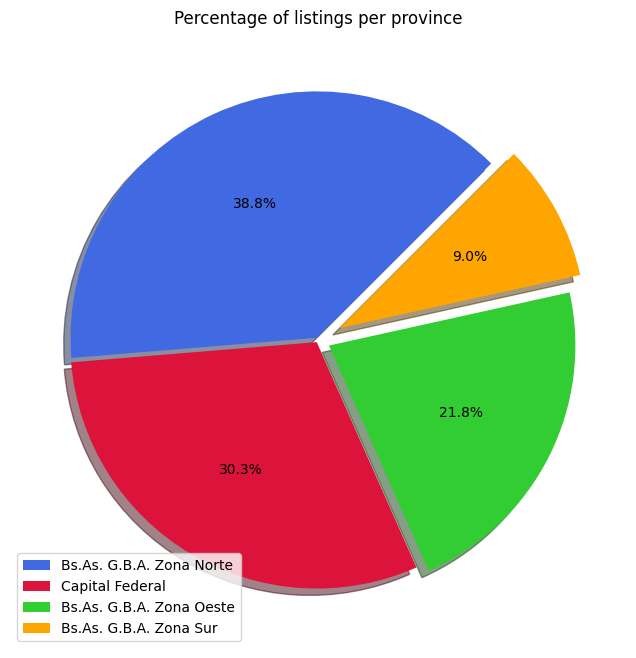

In [39]:
plt.figure(figsize=(8, 8))

((listings_per_province * 100 / len(df_buenos_aires))
.plot.pie(explode=[0.01, 0.01, 0.05, 0.1], autopct='%1.1f%%', shadow=True,
            startangle=45, labeldistance=None,
            colors=['royalblue', 'crimson', 'limegreen', 'orange'])
            )   # type: ignore

plt.ylabel('')
plt.legend(listings_per_province.index, loc="lower left")
plt.title('Percentage of listings per province')
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

We can see that province `Bs.As. G.B.A. Zona Norte` has the highest listings with 38%. Followed by `Capital Federal` with 30% and `Bs.As. G.B.A. Zona Oeste` with 21%. Finally, `Bs.As. G.B.A. Zona Sur` has the lowest listings with 9%.
A quick research tells us that the province with the highest listings (`Bs.As. G.B.A. Zona Norte`) is one of the top 4 provinces in the country, which explains why so many listings are in this province.

- **Bs.As. G.B.A. Zona Norte (Northern Zone of Greater Buenos Aires)**
  - **Class Type**: Affluent, upper-middle to upper-class.
  - **Real Estate**: High property values, upscale residential areas, and gated communities.

- **Capital Federal (Autonomous City of Buenos Aires)**
  - **Class Type**: Diverse, ranging from working-class to upper-class.
  - **Real Estate**: Diverse property market with high values in central neighborhoods like Palermo, Recoleta, and Puerto Madero.

- **Bs.As. G.B.A. Zona Oeste (Western Zone of Greater Buenos Aires)**
  - **Class Type**: Mixed, predominantly middle-income and working-class.
  - **Real Estate**: Generally lower property values compared to the northern zone, with a mix of residential and industrial areas.

- **Bs.As. G.B.A. Zona Sur (Southern Zone of Greater Buenos Aires)**
  - **Class Type**: Predominantly middle to lower-income.
  - **Real Estate**: Lower property values, with some areas undergoing urban renewal and modernization projects.

#### **Investigate lat-lon**

Next, we will extract the latitude and longitude coordinates from the `lat-lon` column. 

</div>


In [40]:
# Split the `lat-lon` column into multiple columns	
df_buenos_aires[['latitude', 'longitude']] = df_buenos_aires['lat-lon'].str.split(',', expand=True).astype(float)

In [41]:
fig = px.scatter_mapbox( 
    df_buenos_aires.dropna(subset=['latitude', 'longitude']),  # Our DataFrame without missing values in `latitude` and `longitude`
    lat='latitude',
    lon='longitude',
    width=900,  # Width of map
    height=800,  # Height of map
    color='price_aprox_usd',
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

<div style="font-family: 'Times New Roman', serif; w">

From the map, we can see that most listings are located in the `Capital Federal` province of Buenos Aires, specifically in the`Autonomous City of Buenos Aires`.

We also observe that we have some listings that are not in Argentina. Possibly, it was due to the scraping process.
We will focus on the listings in the `Capital Federal` province. Below is the map of the `Capital Federal` province and all the departments in the city.

<img src= "https://www.mapsland.com/maps/south-america/argentina/buenos-aires/large-tourist-and-administrative-subdivisions-map-of-buenos-aires-city.jpg" width=60% style="display: block; margin-left: auto; margin-right: auto;"/>


## **Data preparation (preprocessing)**

### **Data cleaning**

Now, we will proceed with the data cleaning process and we will base our process on the EDA results.

</div>

In [42]:
# Columns with more than 50% of values missing	
def nan_columns(df):
    """Columns with more than 50% of values missing"""
    cols_series = df.isna().sum() / len(df)
    return (cols_series[cols_series >= 0.5]).index

In [43]:
def wrangle(filepath):
    """
    Read and wrangle data from CSV file

    Parameters
    ---------- 
    filepath: str
        Path to CSV file

    Returns
    -------
    df: pandas.DataFrame
        Wrangled data
    """
    
    # Read CSV file
    df = pd.read_csv(filepath, low_memory=False)

    # Subset data: Apartments in "Capital Federal", less than $400,000 
    mask_cf = df["place_with_parent_names"].str.contains("capital federal", case=False)
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] <= 400_000
    df = df[mask_cf & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_total_in_m2" and "surface_covered_in_m2"
    # Values are based on the get_quantile_category() analysis
    mask_sc = df['surface_covered_in_m2'].between(34, 500)
    mask_st = df['surface_total_in_m2'] > 0
    df = df[mask_sc & mask_st]

    # Split "lat-lon" column
    df[["latitude", "longitude"]] = df["lat-lon"].str.split(",", expand=True).astype(float)

    # Split "place_with_parent_names" column
    df['municipality'] = df.place_with_parent_names.str.split('|', expand=True)[3]
    
    # Drop unnecessary columns
    df.drop(columns=["place_with_parent_names", "lat-lon", "price_per_m2",], axis=1, inplace=True)
    
    # Drop null columns (50%+ null rows)
    ## Namely `floor`, `expenses` and `price_usd_per_m2`
    nan_cols = nan_columns(df)
    df.drop(columns=nan_cols, inplace=True)

    # Drop low- and high-cardinality categorical variables
    df.drop(columns=['operation', 'property_type', 'currency', 'properati_url'], inplace=True)

    # Drop leaky columns
    df.drop(columns=['price', 'price_aprox_local_currency'], inplace=True)

    # Remove empty rows from municipality
    df = df[df['municipality'].str.len() > 0]

    # Proper headings for our data
    proper_headings = ['municipality', 'latitude', 'longitude', 'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'price_aprox_usd']
    
    return df[proper_headings].reset_index(drop=True)

In [44]:
# Run wrangle function	
df = wrangle('data/buenos-aires-real-estate.csv')

# Create a copy of the original dataframe for later use
df_full = df.copy()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   municipality           4609 non-null   object 
 1   latitude               4467 non-null   float64
 2   longitude              4467 non-null   float64
 3   surface_total_in_m2    4609 non-null   float64
 4   surface_covered_in_m2  4609 non-null   float64
 5   rooms                  3482 non-null   float64
 6   price_aprox_usd        4609 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.2+ KB


In [72]:
pd.options.display.float_format = '{:.10f}'.format

df.head(4)

latitude      longitude  surface_covered_in_m2   price_aprox_usd
0 -34.6047834183 -58.4586812499         110.0000000000 180000.0000000000
1 -34.5846508988 -58.4546932614          70.0000000000 129000.0000000000
2 -34.6389789000 -58.5001150000          42.0000000000  87000.0000000000
3 -34.6252219000 -58.3823825000          42.0000000000  57000.0000000000

<div style="font-family: 'Times New Roman', serif;">

Our data is clean and ready to use. We filtered the data by province to only focus on the `Capital Federal` province. We also dropped the columns with more than 50% of values missing and set the limit for the price to be less than $400,000. We also split the `lat-lon` column into two columns `latitude` and `longitude` and dropped the original column. 

We also dropped the columns `price_aprox_local_currency`, `currency`, `price_aprox_usd`, and `price` because we observed inconsistent data. We also dropped the columns `price_per_m2` and `price_usd_per_m2` because they were leaky. 


### **Visualize Data**

We will visualize the data after wrangling to gain insights. We will start by examining the average price of the houses by municipality.

</div>

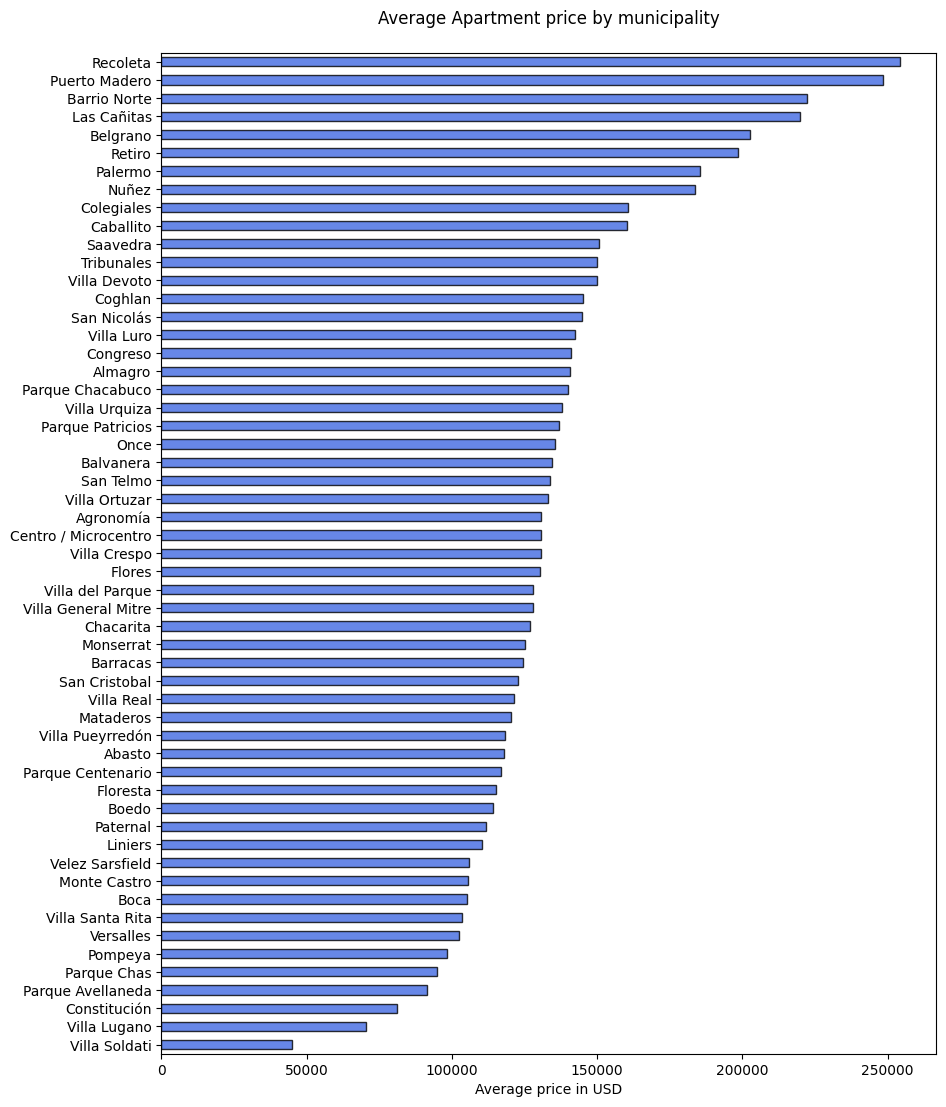

In [47]:
# Horizontal bar chart of Average price by municipality
plt.figure(figsize=(10, 13))
(df.groupby('municipality')
 .price_aprox_usd.mean().sort_values(ascending=True)
 .plot.barh(color='royalblue', alpha=0.8, edgecolor='black')
 )

plt.ylabel('')
plt.xlabel('Average price in USD')
plt.title('Average Apartment price by municipality\n')
plt.show()

<div style="font-family: 'Times New Roman', serif;">

From the above chart, we conclude the following:

- **High Prices in the North and East:**
    - The northern and eastern neighborhoods of Buenos Aires, especially those close to the city center and
    waterfront, tend to have the highest apartment prices. This is likely due to their proximity to business districts, cultural attractions, and better infrastructure.

- **Moderate Prices in Central Areas:**
    - Central neighborhoods have moderate to high prices, reflecting a mix of residential and commercial use, with good access to amenities and transport.

- **Lower Prices in the South and West:**
    - The southern and western parts of Buenos Aires generally have lower apartment prices. These areas are more residential, with some industrial zones and lower socio-economic conditions compared to the north and east.


Moving on, we will explore the general trend of price vs. total surface and price vs. covered surface.

</div>

In [48]:
# Scatter plot of price vs. total_surface_in_m2 and price vs. covered_suface_in_m2 one next to the other 
# You can zoom in and out 

# Price vs. total surface
fig = px.scatter(
    df,
    x="surface_total_in_m2",
    y="price_aprox_usd",
    color="price_aprox_usd",
    title="Price vs. total surface in m\u00B2",
    labels={"surface_total_in_m2": "Total surface in m\u00B2", "price_aprox_usd": "Price in USD"},
    template="plotly_white",
    width=800,
    height=600
)

fig.update_traces(
    marker=dict(size=8, line=dict(width=1, color='white')),
    selector=dict(mode='markers')
    )

fig.show()

# Price vs. covered surface
fig = px.scatter(
    df,
    x="surface_covered_in_m2",
    y="price_aprox_usd",
    color="price_aprox_usd",
    title="Price vs. covered surface in m\u00B2",
    labels={"suface_covered_in_m2": "Covered surface in m\u00B2", "price_aprox_usd": "Price in USD"},
    template="plotly_white",
    width=800,
    height=600
)

fig.update_traces(
    marker=dict(size=8, line=dict(width=1, color='white')),
    selector=dict(mode='markers')
    )

fig.show()

<div style="font-family: 'Times New Roman', serif;">

We can see that there is a positive correlation between price and surface area. When surface area is higher, the price tends to increase. This holds true for both `total_surface_in_m2` and `covered_suface_in_m2`.

There is a slight curvature toward the top of the scatter plot in the case of `total_surface_in_m2` which suggests an exponential relationship. Inversely, there is a slight curvature toward the bottom of the plot in the case of `covered_suface_in_m2`, which suggests a logarithmic relationship.

Examining the spread of the data, we can see that variability is more pronounced in the `covered_surface_in_m2` column than in the `total_suface_in_m2` column.

It might not be clearly visible, but with the help of zoom and box selection, we can observe the phenomenon.

</div>

In [49]:
# Plot 3d scatter plot of price vs. latitude and longitude 
# With samll markers and color gradient

fig = px.scatter_3d(
    df,
    x="latitude",
    y="longitude",
    z="price_aprox_usd",
    color="price_aprox_usd",
    title="Price vs. latitude and longitude",
    labels={"longitude": "Longitude", "latitude": "Latitude", "price_aprox_usd": "Price in USD"},
    template="plotly_white",
    width=800,
    height=600
)   

fig.update_traces(
    marker=dict(size=4, line=dict(width=1, color='white')),
    selector=dict(mode='markers')
    )

fig.show()

<div style="font-family: 'Times New Roman', serif;">

From the 3D scatter plot, we can see that as we move towards the coast, the price tends to increase.
</div>

In [50]:
# Scatter plot of price vs. latitude and longitude with price as a color gradient
# Map is open-street-map and zoomed in
fig = px.scatter_mapbox( 
    df,
    lat='latitude',
    lon='longitude',

    mapbox_style="open-street-map",  # Mapbox style

    zoom=11,  # Zoom level
    title="Price vs. latitude and longitude",
    labels={"longitude": "Longitude", "latitude": "Latitude", "price_aprox_usd": "Price in USD"},

    width=900,  # Width of map
    height=800,  # Height of map

    color='price_aprox_usd',
    size='price_aprox_usd',
    
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.show()

<div style="font-family: 'Times New Roman', serif;">

The Scatter map plot is showing clearly what the 3D Scatter plot is showing. As we move towards the coast, the price tends to increase.

## **Modeling**

We proceed by specifying features and target variable and then Split the data into training and testing sets. We hold 20% for the testing set.

We notice that `municipality` is an **out-of-sample feature**. This happens when certain features (like municipalities) present in the test set were not seen during training, the model may not have learned the necessary patterns to make accurate predictions for these unseen categories. 

Our decision is the following, instead of relying solely on municipality names, we will incorporate latitude and longitude directly as features. This allows our model to learn spatial relationships which might help in generalizing to unseen municipalities.

</div>

In [51]:
# Drop the `department_municipality` column
df.drop(columns=['municipality'], inplace=True)

<div style="font-family: 'Times New Roman', serif;">

We will examine the correlation between features and target variable after cleaning the data and after dropping the `municipality` column.
</div>

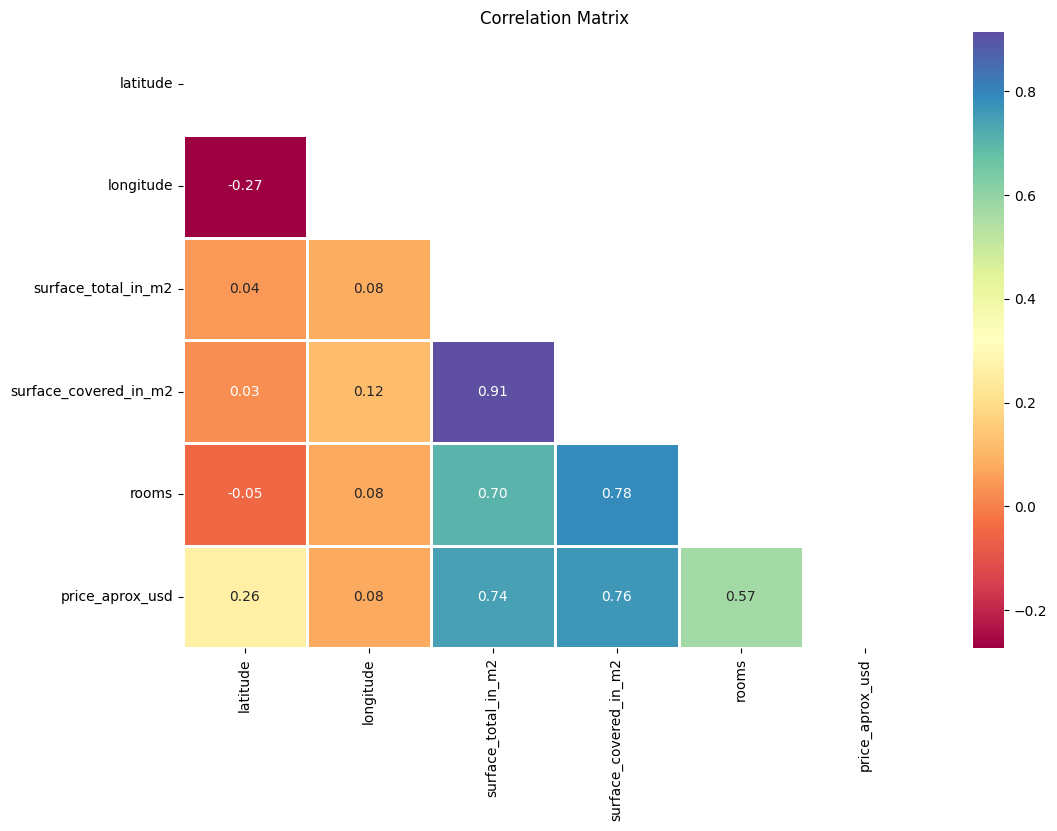

In [52]:
# Correlation matrix between numerical columns
corr_frame = df.corr()  # type: ignore	

# Mask the upper triangle of the correlation matrix
mask_corr_df = np.triu(np.ones_like(corr_frame, dtype=bool))

plt.figure(figsize = (12, 8))
sns.heatmap(corr_frame, annot = True, cmap = "Spectral", linewidths = 2, linecolor = "white", fmt='.2f', mask=mask_corr_df) # type: ignore
plt.title("Correlation Matrix")
plt.show()

<div style="font-family: 'Times New Roman', serif;">

First, we notice that `total_surface_in_m2` and `covered_suface_in_m2` are strongly correlated. This can bring high multi-collinearity into the model. We will have to drop one of them. Our choice is the `total_surface_in_m2` feature.

Next, we notice that `price_aprox_usd` is highly correlated with `total_surface_in_m2` and `covered_suface_in_m2`. Also, `rooms` is  moderately correlated with `price_aprox_usd` and highly correlated with `total_surface_in_m2` and `covered_suface_in_m2`. 

In summary, we will drop `total_surface_in_m2` and `rooms` features.

</div>

In [53]:
# Drop `rooms` and `surface_total_in_m2` columns

df.drop(columns=['rooms', 'surface_total_in_m2'], axis=1, inplace=True)

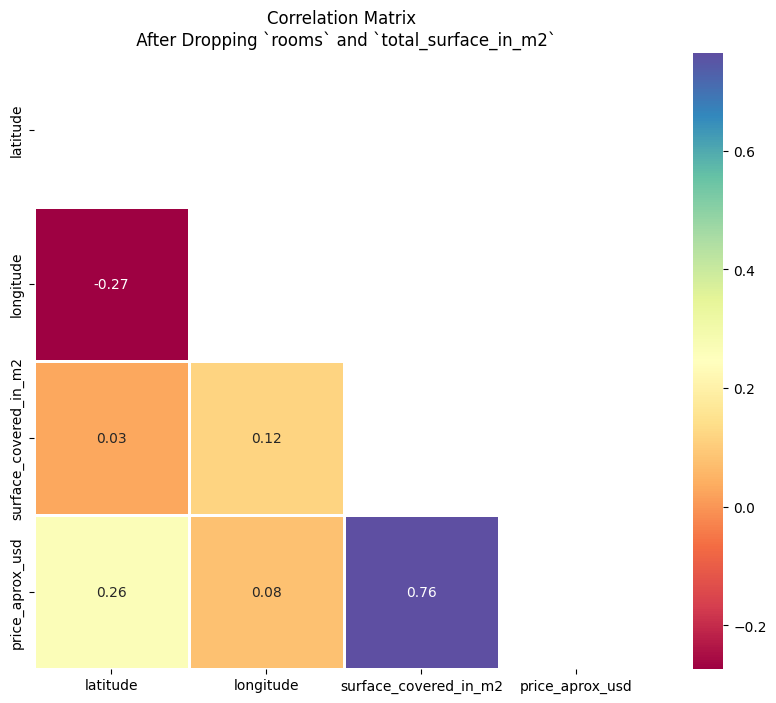

In [54]:
corr_frame_drop = df.corr()  # type: ignore

# Mask the upper triangle of the correlation matrix
mask_corr_df_drop = np.triu(np.ones_like(corr_frame_drop, dtype=bool))

plt.figure(figsize = (10, 8))
sns.heatmap(corr_frame_drop, annot = True, cmap = "Spectral", linewidths = 2, linecolor = "white", fmt='.2f', mask=mask_corr_df_drop) # type: ignore
plt.title("Correlation Matrix \n After Dropping `rooms` and `total_surface_in_m2`")
plt.show()

<div style="font-family: 'Times New Roman', serif;">

### **Split the data**

We will split the data into training and testing sets with 20% of data in the test set, and then scale the data to have zero mean and unit standard deviation.
First, we will check if there are some missing values in the data.

</div>

In [55]:
df.isna().sum(axis=0)

latitude                 142
longitude                142
surface_covered_in_m2      0
price_aprox_usd            0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
print(f"We have {df.shape[0]:,} rows and {df.shape[1]} columns.")

We have 4,467 rows and 4 columns.


In [58]:
# Specify features and target

X = df.drop(columns=['price_aprox_usd'], axis=1)
y = df.price_aprox_usd

In [59]:
# Split data into train and test sets with 20% of data in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print('After split:')
print(f"We have {X_train.shape[0]:,} rows in the training set and {X_test.shape[0]:,} rows in the test set.")

After split:
We have 3,573 rows in the training set and 894 rows in the test set.


In [61]:
# Baseline model
y_pred_baseline = np.full(y_train.shape[0], y_train.mean())

mae_baseline = mean_absolute_error(y_train, y_pred_baseline) 

print(f"Baseline MAE: ${mae_baseline:,.2f}")

Baseline MAE: $59,897.91


In [62]:
(59897.91 - 23809.9879) * 100 / 59897.91

60.249050592917186

<div style="font-family: 'Times New Roman', serif;">

We'll have to beat the baseline model by at least 10% in terms of mean absolute error.

### **Iterate**
</div>

In [63]:
# Add constant to X_train, X_test 
X_train = sm.add_constant(X_train)  
X_test = sm.add_constant(X_test)

# Fit the model
model_0 = sm.OLS(y_train, X_train)
fitted_0 = model_0.fit()

# Print summary	
print(fitted_0.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2163.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:01:35   Log-Likelihood:                -43420.
No. Observations:                3573   AIC:                         8.685e+04
Df Residuals:                    3569   BIC:                         8.687e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.349e+

In [64]:
y_pred_ols_0 = fitted_0.predict(X_test) 

# MAE before inverse scaling (bis)
mae_ols_0 = mean_absolute_error(y_true=y_test, y_pred=y_pred_ols_0)
print(f"OLS MAE: ${mae_ols_0:,.2f}")

OLS MAE: $32,547.91


In [65]:
# Compare MAE
pct_decrease_mae_0 = (mae_baseline - mae_ols_0) * 100 / mae_baseline 
print(f"OLS MAE Decrease: {pct_decrease_mae_0:.2f}%")

OLS MAE Decrease: 45.66%


<div style="font-family: 'Times New Roman', serif;">

Great! We beat the baseline model by 45.6% in terms of mean absolute error. 

#### **Detect Heteroskedasticity using formal test**


The null hypothesis $( H_0 )$ in the context of heteroscedasticity tests is typically formulated as follows:

$H_0: \text{The errors/residuals exhibit homoscedasticity (constant variance).}$

In simpler terms, the null hypothesis states that there is no systematic difference in the variance of errors across different levels or values of the independent variables. If the p-value from the heteroscedasticity test is sufficiently small, we reject this null hypothesis in favor of the alternative hypothesis, indicating that there is evidence of heteroscedasticity present in the data.
To determine whether to reject or not reject the null hypothesis $( H_0)$ based on the p-value:

1. **Reject $( H_0 )$ (Evidence of Effect):**
   - Small p-value (p < α, where α is the significance level): Strong evidence against $( H_0 )$.
   - Indicates that observed data is unlikely under the assumption of $( H_0 )$.

2. **Do Not Reject $( H_0 )$ (Lack of Evidence of Effect):**
   - Large p-value (p ≥ α): Not enough evidence to conclude against $( H_0 )$.
   - Suggests that observed data is consistent with $( H_0 )$ or does not deviate significantly from expected values under $( H_0 )$.

In the context of heteroscedasticity tests:
- Small p-value: Evidence of heteroscedasticity; reject the assumption of constant variance.
- Large p-value: Insufficient evidence of heteroscedasticity; do not reject the assumption of constant variance.

</div>

In [66]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(fitted_0.resid, fitted_0.model.exog) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 7.743647625885714e-80
Reject the null hypothesis: Heteroskedasticity is present.


<div style="font-family: 'Times New Roman', serif; w">

We got a p-value of **7.74e-80**, which exteremely small. Therefore, we reject the null hypothesis $( H_0 )$ in favor of the alternative hypothesis, indicating that there is evidence of heteroscedasticity present in the data.

#### **Detect Heteroskedasticity using visual methods: Residuals plot**

</div>

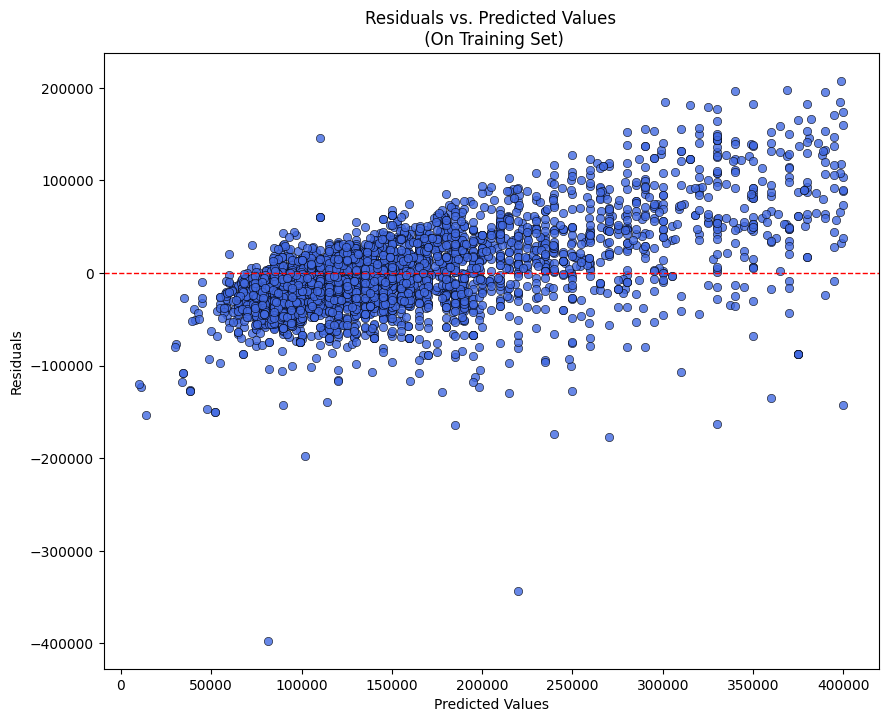

In [67]:
# plot residuals vs. predicted values

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_train, y=fitted_0.resid, color='royalblue', edgecolor='black', alpha=0.8) 
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values\n (On Training Set)")
plt.xlabel("Predicted Values")
plt.xticks(rotation=0)
plt.ylabel("Residuals")
plt.show()

<div style="font-family: 'Times New Roman', serif;">

We can see that as predicted values increase, the variability of the residuals increases too, indicating heteroscedasticity.

We will deal with it by transforming the target variable and some of the features as needed..

</div>

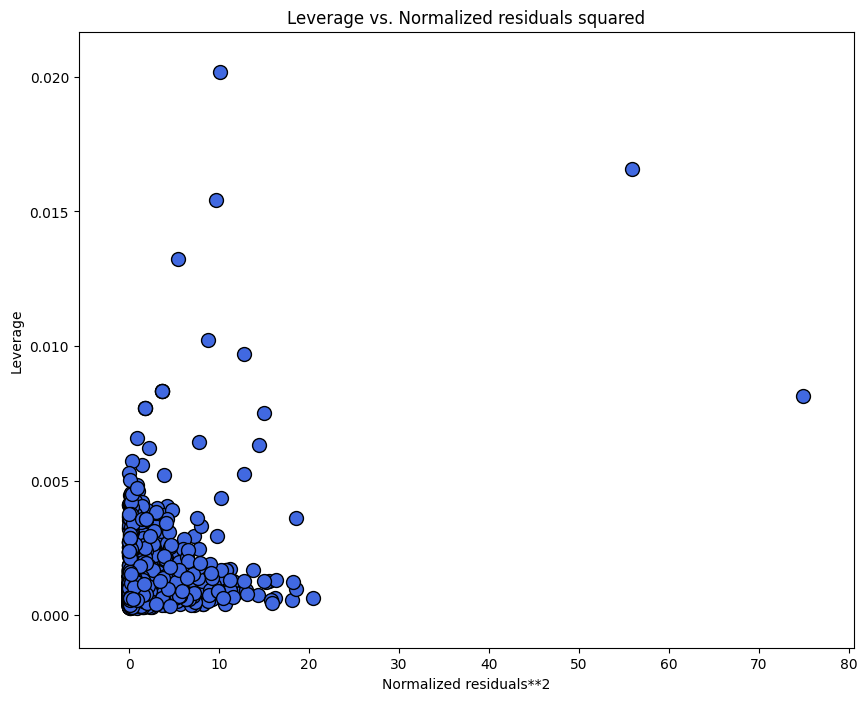

In [68]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# plot leverage vs. residuals

fig, ax = plt.subplots(figsize=(10, 8))
plot_leverage_resid2(fitted_0, ax=ax, markersize=10, markeredgecolor="black", markerfacecolor="royalblue")  # type: ignore
# Customize text properties
for text in ax.texts:
    # uncomment the following line if you want to adjust the text size
    # text.set_fontsize(8)

    # set visibility to True if you want to show the observations indices on the plot
    text.set_visible(False)  
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

The graph above shows the leverage vs. normalized residuals. We can see that the leverage is high for some of the observations, which may lead to our model not being able to predict accurately. High leverage points are considered influential in the model.
Testing the assumption of **Normality of residuals**:

The residuals should exhibit a normal distribution. This is easiest to detect by inspecting a QQ-plot of residuals and a residuals vs dependent variable plot.

</div>

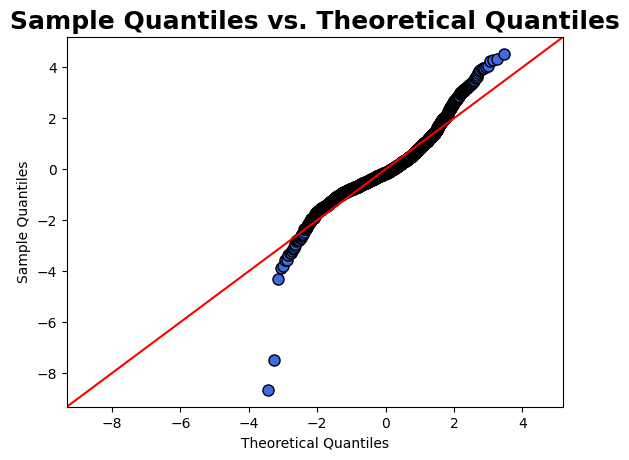

In [69]:
# Plot sample quantiles vs. the theoretical quantiles 
 
fig = sm.graphics.qqplot(fitted_0.resid, dist=sps.norm, line='45', fit=True, marker="o", markersize=8, markeredgecolor="black", markerfacecolor="royalblue")
plt.title("Sample Quantiles vs. Theoretical Quantiles", fontsize=18, fontweight="bold") 
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

We can see that the residuals are not normally distributed. The second bisection of the QQ-plot indicates the case where the residuals are normally distributed, and from examining the graph we spot some a trend not coresponding to the normal distribution. 

## **Reverse Heteroskedasticity**

### **Detect Influential Points**

</div>

In [70]:
# Get the influence statistics
influence = fitted_0.get_influence() 

In [71]:
pd.options.display.float_format = '{:.10f}'.format

# Transform the influence statistics into a DataFrame
influence_df = influence.summary_frame()
influence_df.head(4)

dfb_const  dfb_latitude  dfb_longitude  dfb_surface_covered_in_m2  \
2465  0.0013875098  0.0027265339  -0.0003038204               0.0023600850   
1441 -0.0005501307 -0.0012905022   0.0002983044              -0.0036302237   
3877  0.0017178100 -0.0071672345   0.0089028115               0.0040888725   
2677 -0.0007180087 -0.0032042522   0.0017407564               0.0012657505   

          cooks_d  standard_resid     hat_diag  dffits_internal  \
2465 0.0000051071   -0.1441472463 0.0009821919    -0.0045197864   
1441 0.0000106503    0.3105506922 0.0004415369     0.0065269740   
3877 0.0000695053   -0.5116022238 0.0010610898    -0.0166739703   
2677 0.0000070414   -0.1737247103 0.0009323726    -0.0053071199   

      student_resid        dffits  
2465  -0.1441274701 -0.0045191663  
1441   0.3105113778  0.0065261477  
3877  -0.5115493036 -0.0166722456  
2677  -0.1737011051 -0.0053063988

<div style="font-family: 'Times New Roman', serif; w">

We will rely on the `Summary Frame` to guide us in our analysis in reversing heteroskedasticity.

#### **Visual Ispection**

</div>

Number of Influential points with the threshold of 0.0014214375783342492, is 203.


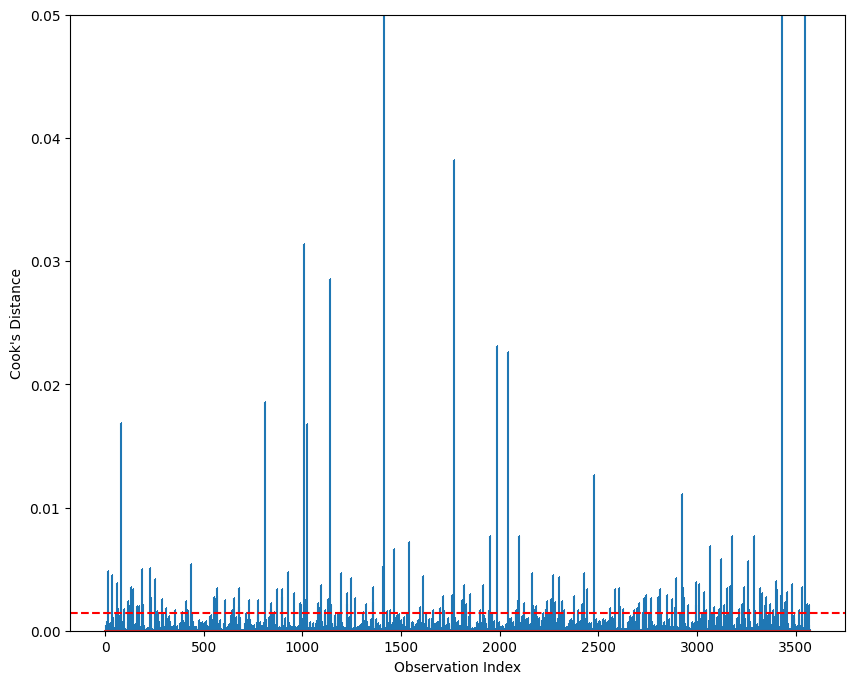

In [73]:
threshold_leverage = 3 * influence_df.cooks_d.mean()
number_influential = influence_df[influence_df.cooks_d > threshold_leverage].shape[0]

print(f"Number of Influential points with the threshold of {threshold_leverage}, is {number_influential}.")

plt.figure(figsize=(10, 8))
plt.stem(np.arange(len(influence_df)), influence_df.cooks_d, markerfmt=",")
plt.axhline(y=threshold_leverage, color='r', linestyle='--')
plt.ylim(0, 0.05)
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

`Cook's Distance` is a measure of the influence of an observation on the regression model. We can see that there are more than 15 influential points with a Cook's Distance above the threshold chosen. We will have to find the sweet spot to remove these influential points and at the same time reverse the heteroskedasticity effect.

</div>

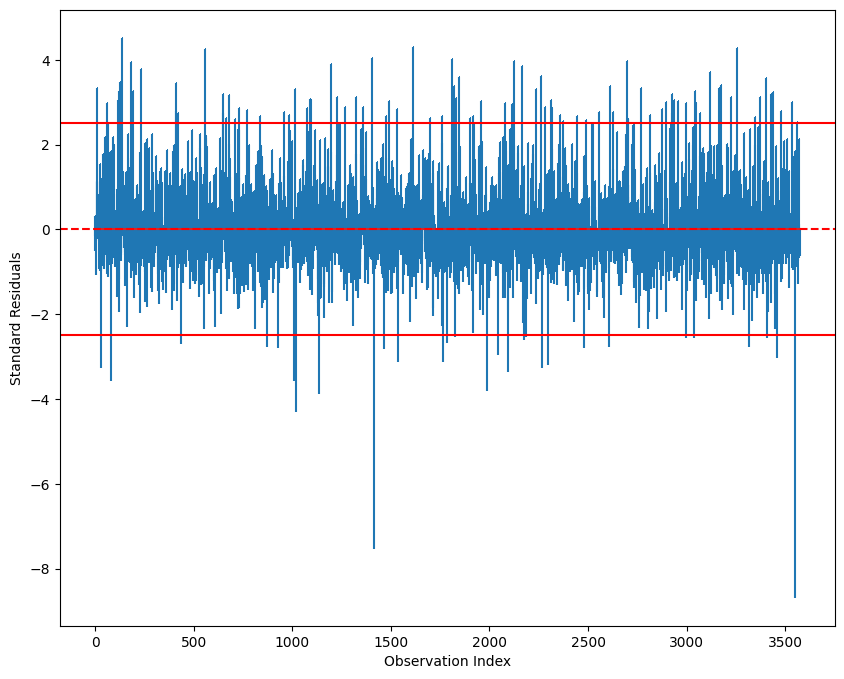

In [74]:
threshold_residual = 2.5

plt.figure(figsize=(10, 8))
plt.stem(np.arange(len(influence_df)), influence_df.standard_resid, markerfmt=",")
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=-threshold_residual, color='r')
plt.axhline(y=threshold_residual, color='r')

plt.xlabel('Observation Index')
plt.ylabel('Standard Residuals')
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

The `Standard Residuals` vs. `Observation Index` plot shows that there are some outliers in the data based on the threshold chosen.

#### **Remove high leverage & high residual points**

</div>

In [75]:

high_leverage_threshold = threshold_leverage
high_residual_threshold = threshold_residual

# Identify high leverage and high residual points
high_leverage_points = influence_df.cooks_d > high_leverage_threshold
high_residual_points = np.abs(influence_df.standard_resid) > high_residual_threshold

# Combine both conditions to find points with either high leverage or high residuals
influential_points = high_leverage_points & high_residual_points

# Print the indices of the influential points
print(f"We found {len(np.where(influential_points)[0])} influential points that has high leverage and high residuals.")
print("Indices of influential points:\n", np.where(influential_points)[0])

We found 102 influential points that has high leverage and high residuals.
Indices of influential points:
 [  12   32   60   82  115  122  129  139  185  193  232  411  412  420
  436  559  651  680  712  772  871  926  959  985 1007 1016 1021 1089
 1093 1138 1196 1225 1267 1323 1359 1406 1413 1463 1529 1538 1612 1698
 1766 1811 1820 1825 1829 1847 1900 1988 2042 2080 2092 2123 2166 2184
 2238 2260 2268 2282 2299 2314 2316 2375 2477 2557 2605 2611 2627 2695
 2704 2767 2816 2874 2894 2926 2927 2929 2936 2954 2994 2996 3035 3047
 3066 3120 3166 3175 3226 3257 3318 3348 3372 3400 3405 3429 3438 3456
 3480 3532 3547 3559]


In [76]:
# Remove influential points from the Train set
filtered_X_train = X_train[~influential_points]
filtered_y_train = y_train[~influential_points]

<div style="font-family: 'Times New Roman', serif; w">

#### **Fit model on Filtered Data**

</div>

In [77]:
# Fit the model on the filtered Train set and print summary
model_1 = sm.OLS(filtered_y_train, filtered_X_train)
fitted_1 = model_1.fit()

print(fitted_1.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2984.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:05:10   Log-Likelihood:                -41541.
No. Observations:                3471   AIC:                         8.309e+04
Df Residuals:                    3467   BIC:                         8.311e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.971e+

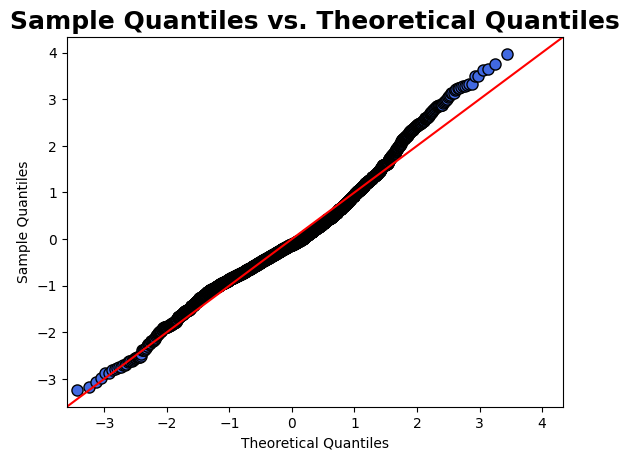

In [78]:
# Plot sample quantiles vs. the theoretical quantiles after transformation
 
fig = sm.graphics.qqplot(fitted_1.resid, dist=sps.norm, line='45', fit=True, marker="o",
                          markersize=8, markeredgecolor="black", markerfacecolor="royalblue")
plt.title("Sample Quantiles vs. Theoretical Quantiles", fontsize=18, fontweight="bold")
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

The Q-Q plot shows that the residuals are slightly now normally distributed. With some inconsistent behaviour in upper quantiles.

</div>

In [79]:
# Predict on the test set
y_pred_ols_1 = fitted_1.predict(X_test)

# Calculate MAE for the test set
mae_ols_1 = mean_absolute_error(y_true=y_test, y_pred=y_pred_ols_1)
print(f"OLS MAE: ${mae_ols_1:,.2f}")

OLS MAE: $32,162.00


<div style="font-family: 'Times New Roman', serif; w">

The MAE has decreased slightly when we removed influential points.

</div>

In [80]:
# Compare MAE & RMSE

pct_decrease_mae_1 = (mae_baseline - mae_ols_1) * 100 / mae_baseline 

print(f"OLS MAE Decrease (After): {pct_decrease_mae_1:.2f}%")


OLS MAE Decrease (After): 46.31%


In [81]:
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(fitted_1.resid, fitted_1.model.exog) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 4.765770147961118e-79
Reject the null hypothesis: Heteroskedasticity is present.


<div style="font-family: 'Times New Roman', serif; w">

Although the model has improved slightly, the heteroskedasticity is still present. This suggest that we need some advanced techniques to deal with it.

</div>

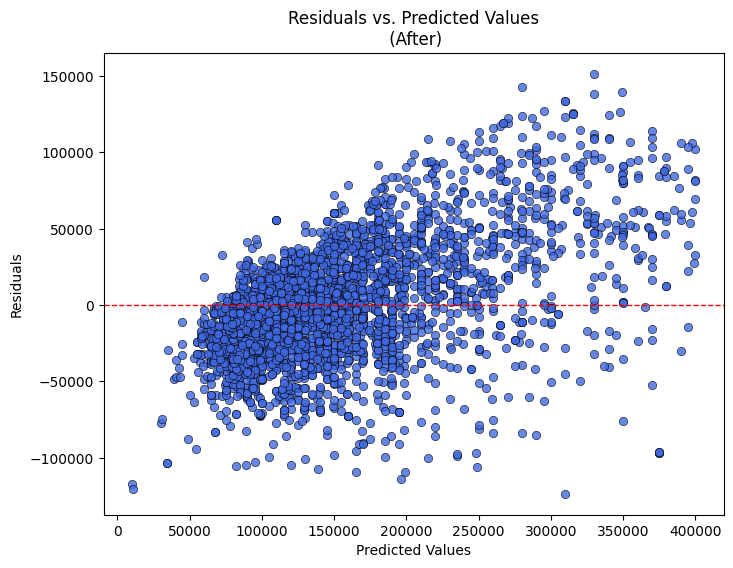

In [82]:
# plot residuals vs. predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=fitted_1.resid, color='royalblue', edgecolor='black', alpha=0.8) 
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values\n (After)")
plt.xlabel("Predicted Values")
plt.xticks(rotation=0)
plt.ylabel("Residuals")
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

The range for the `Predicted Values` has chrunked due to influential point removal. But variance of the residuals is still not constant.
Some of the advanced techniques to deal with heteroskedasticity are **Box-Cox transformation**. We will use this technique to transform the both the target variable and the `surface_covered_in_m2` variable, because from previous analysis, we saw that `surface_covered_in_m2` is right skewed. 

#### **Transform Data: Box-Cox**
We will build a function to apply Box-Cox transformation to both the target variable and the `surface_covered_in_m2` variable and choose the best lambda value that will minimize the MAE error and invert the heteroskedasticity effect.

We will rely on the `Breusch-Pagan test` to determine if heteroskedasticity is present.
##### **Find best lambda**

</div>

In [83]:
from sklearn.preprocessing import  StandardScaler
from scipy.special import inv_boxcox

# Define lambda values to test
def test_lambda(lambdas, filtered_X_train, filtered_y_train, X_test, y_test):

    bp_list = list()
    mae_list = list()

    for lambda_ in lambdas:
        X_train_tl = filtered_X_train.copy()
        X_test_tl = X_test.copy()

        y_train_tl = filtered_y_train.copy()
        y_test_tl = y_test.copy()
        
        # Apply Box-Cox transformation to `covered_suface_in_m2`
        X_train_tl.surface_covered_in_m2 = sps.boxcox(X_train_tl.surface_covered_in_m2, lambda_)
        X_test_tl.surface_covered_in_m2 = sps.boxcox(X_test_tl.surface_covered_in_m2, lambda_)

        # Apply Box-Cox transformation to `price_usd`
        y_train_tl = sps.boxcox(y_train_tl, lambda_)
        y_test_tl = sps.boxcox(y_test_tl, lambda_)

        # Fit the model
        model = sm.OLS(y_train_tl, X_train_tl) 
        fitted = model.fit()
        
        # Perform Breusch-Pagan test
        bp_test = het_breuschpagan(fitted.resid, fitted.model.exog)
        bp_list.append(bp_test[1])

        # Predict on the test set
        y_pred_ols_test = fitted.predict(X_test_tl)

        # Invert the Box-Cox transformation by s.inv_boxcox
        y_pred_ols_test_inv = inv_boxcox(y_pred_ols_test, lambda_)

        # Calculate MAE
        mae_ols = mean_absolute_error(y_true=y_test, y_pred=y_pred_ols_test_inv)
        mae_list.append(mae_ols)

    df_results = pd. DataFrame({'lambda_value': lambdas, 'Breusch-Pagan test p-value': bp_list, 'MAE': mae_list})

    # Filter df_results for p-value > 0.05 which means we fail to reject the null hypothesis that Heteroskedasticity is present
    df_results = df_results[df_results['Breusch-Pagan test p-value'] > 0.05]  # Heteroskedasticity is not present 

    return df_results.sort_values(by='MAE', ascending=True).reset_index(drop=True)

<div style="font-family: 'Times New Roman', serif; w">

We will apply `test_lambda` function to `X_train`, `y_train`, `X_test`, `y_test` and feed the function with `np.arange(-0.5, 0.5, 0.01)` as the range for the possible lambda values we believe will minimize the MAE error.

</div>

In [84]:
test_lambda_df = test_lambda(np.arange(-0.5, 0.5, 0.01), X_train, y_train, X_test, y_test)
test_lambda_df[:5] # top 5 rows

lambda_value  Breusch-Pagan test p-value              MAE
0 -0.0300000000                0.3941062261 31301.4278108548
1 -0.0400000000                0.4502643156 31301.5204312865
2 -0.0200000000                0.3381701583 31301.5370614246
3 -0.0100000000                0.2839781052 31301.7583670346
4 -0.0500000000                0.5051692994 31301.7700084126

<div style="font-family: 'Times New Roman', serif; w">

The results show that the best lambda value is **-0.03**, and as we can see the p-value is greater than 0.05, so we fail to reject the null hypothesis that Heteroskedasticity is present.

##### **Fit model**

</div>

In [85]:
X_train_tr = X_train.copy()
y_train_tr = y_train.copy()

# Retrieve the best lambda value from the test_lambda_df
best_lambda = test_lambda_df.lambda_value[0]

# Apply Box-Cox transformation to `covered_suface_in_m2` & `price_aprox_usd` using the best lambda value
X_train_tr.surface_covered_in_m2 = sps.boxcox(X_train_tr.surface_covered_in_m2, best_lambda)  # type: ignore
y_train_tr = sps.boxcox(y_train_tr, best_lambda)

# Fit the model on the filtered Train set and print summary
model_2 = sm.OLS(y_train_tr, X_train_tr)
fitted_2 = model_2.fit()

print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2167.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:05:11   Log-Likelihood:                 826.21
No. Observations:                3573   AIC:                            -1644.
Df Residuals:                    3569   BIC:                            -1620.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   149.48

In [86]:
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(fitted_2.resid, fitted_2.model.exog) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 0.3941062260525352
Fail to reject the null hypothesis: Heteroskedasticity is not present.


In [87]:
X_test_tr = X_test.copy()

X_test_tr.surface_covered_in_m2 = sps.boxcox(X_test_tr.surface_covered_in_m2, best_lambda)  # type: ignore

# Predict on the transformed test set
y_pred_ols_2 = fitted_2.predict(X_test_tr)


# Invert the Box-Cox transformation by inv_boxcox
y_pred_ols_2_inv = inv_boxcox(y_pred_ols_2, best_lambda)


# Calculate MAE for the test set
mae_ols_2 = mean_absolute_error(y_true=y_test, y_pred=y_pred_ols_2_inv)
print(f"OLS MAE: ${mae_ols_2:,.2f}")

OLS MAE: $31,301.43


<div style="font-family: 'Times New Roman', serif; w">

As we anticipated, the MAE has decreased from iteration 1 to iteration 2. 

##### **Transform Filtered Data: Box-Cox**

Now, we will apply Box-Cox transformation to `price_aprox_usd` & `covered_surface_in_m2` on the filtered train and test sets.

</div>

In [88]:
# Apply Box-Cox transformation to `price_usd` & `covered_surface_in_m2`
X_train_sc = filtered_X_train.copy()
y_train_sc = filtered_y_train.copy()

X_test_sc = X_test.copy()
y_test_sc = y_test.copy()

best_lambda = test_lambda_df.lambda_value[0]
X_train_sc.surface_covered_in_m2 = sps.boxcox(X_train_sc.surface_covered_in_m2, best_lambda)  # type: ignore
y_train_sc = sps.boxcox(y_train_sc, best_lambda)

X_test_sc.surface_covered_in_m2 = sps.boxcox(X_test_sc.surface_covered_in_m2, best_lambda)  # type: ignore
y_test_sc = sps.boxcox(y_test_sc, best_lambda)

# Scale Data
std_scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

X_train_sc = pd.DataFrame(std_scaler.fit_transform(X_train_sc), columns=X_train.columns, index=filtered_X_train.index)  # type: ignore
X_test_sc = pd.DataFrame(std_scaler.transform(X_test_sc), columns=X_test.columns, index=X_test.index)  # type: ignore

X_train_sc.const = 1
X_test_sc.const = 1


# Fit the model on the filtered Train set and print summary
model_3 = sm.OLS(y_train_sc, X_train_sc)
fitted_3 = model_3.fit()

print(fitted_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     2554.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:05:11   Log-Likelihood:                 1172.2
No. Observations:                3471   AIC:                            -2336.
Df Residuals:                    3467   BIC:                            -2312.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.96

In [89]:
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(fitted_3.resid, fitted_3.model.exog) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 0.04038456512228894
Reject the null hypothesis: Heteroskedasticity is present.


In [90]:
# Predict on the transformed test set
y_pred_ols_3 = fitted_3.predict(X_test_sc)

# Invert the Box-Cox transformation by inv_boxcox
y_pred_ols_3_inv = inv_boxcox(y_pred_ols_3, best_lambda)

# Calculate MAE for the test set
mae_ols_3 = mean_absolute_error(y_true=y_test, y_pred=y_pred_ols_3_inv)
print(f"OLS MAE: ${mae_ols_3:,.2f}")

OLS MAE: $31,402.39


<div style="font-family: 'Times New Roman', serif; w">

Although the model R-squared and MAE is improved, the heteroskedasticity is still present. Our model has a very tight interval for `leverage` and `residuals` thresholds to exclude influential points and reverse heteroskedasticity.

</div>

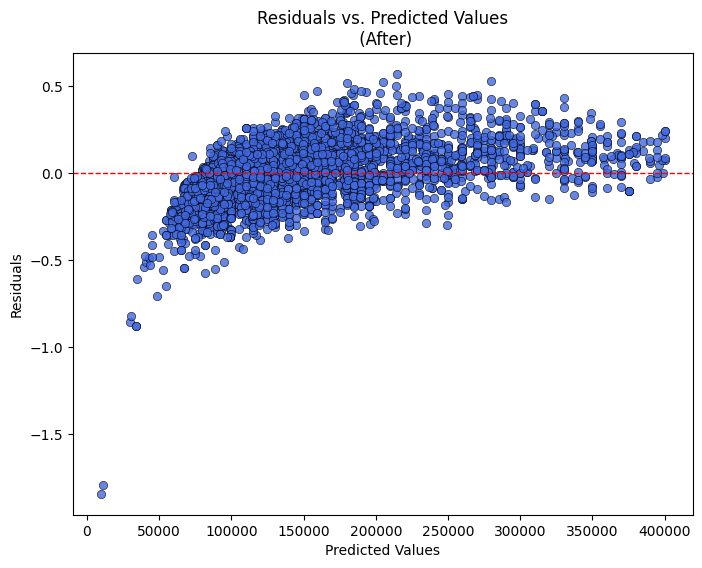

In [91]:
# plot residuals vs. predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=fitted_3.resid, color='royalblue', edgecolor='black', alpha=0.8) 
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values\n (After)")
plt.xlabel("Predicted Values")
plt.xticks(rotation=0)
plt.ylabel("Residuals")
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

We still observe heteroskedasticity in the residuals.

We will use another algorithm on our filtered dataset, which will incorporate all the insights we have gathered so far from the OLS model.

We have chosen `Gradient Boosting Regressor` as the final model.

## **Final Model: Gradient Boosting Regressor**

### **Fiting the model on cleaned data**

</div>

In [92]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score	


# Fit the model on the filtered Train set and print summary
model_4 = GradientBoostingRegressor(n_estimators=1_000, random_state=42)
fitted_4 = model_4.fit(X_train, y_train)
y_pred_gb_0 = model_4.predict(X_test)

# Calculate MAE for the test set
mae_gb = mean_absolute_error(y_true=y_test, y_pred=y_pred_gb_0)
print(f"GB MAE: ${mae_gb:,.2f}")

r2_gb = r2_score(y_true=y_test, y_pred=y_pred_gb_0)
print(f"GB R-squared: {r2_gb:.2f}")

GB MAE: $24,549.55
GB R-squared: 0.79


<div style="font-family: 'Times New Roman', serif; w">

We can see that the model performs better than the OLS model. But we still need to check for heteroskedasticity.

</div>

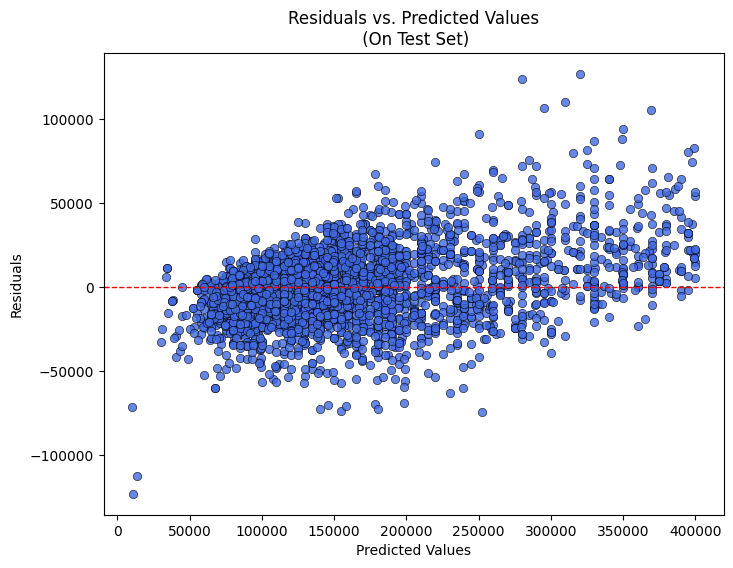

In [94]:
resid_gb_0 = y_train - fitted_4.predict(X_train)

# plot residuals vs. predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=resid_gb_0, color='royalblue', edgecolor='black', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values\n (On Test Set)")
plt.xlabel("Predicted Values")
plt.xticks(rotation=0)
plt.ylabel("Residuals")
plt.show()

In [95]:
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(resid_gb_0, sm.add_constant(X_train)) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 4.414968484119226e-19
Reject the null hypothesis: Heteroskedasticity is present.


<div style="font-family: 'Times New Roman', serif; w">

Unfortunately, we still observe heteroskedasticity in the residuals both using the `Breusch-Pagan` test and the `Visual Inspection` technique.

### **Fitting the model on Filtered Data**

</div>

In [96]:
# Fit the model on the filtered Train set and print summary
model_5 = GradientBoostingRegressor(n_estimators=1_000, random_state=42)

fitted_5 = model_5.fit(filtered_X_train.drop('const', axis=1), filtered_y_train)  # type: ignore
y_pred_gb_1 = model_5.predict(X_test)

# Calculate MAE for the test set
mae_gb_2 = mean_absolute_error(y_true=y_test, y_pred=y_pred_gb_1)
print(f"GB MAE: ${mae_gb_2:,.2f}")

r2_gb_2= r2_score(y_true=y_test, y_pred=y_pred_gb_1)
print(f"GB R-squared: {r2_gb_2:.2f}")

GB MAE: $24,653.71
GB R-squared: 0.77


In [97]:
resid_gb_1 = y_train - fitted_5.predict(X_train)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(resid_gb_1, sm.add_constant(X_train)) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 3.567786060282912e-21
Reject the null hypothesis: Heteroskedasticity is present.


<div style="font-family: 'Times New Roman', serif; w">

The model still has heteroskedasticity.
### **Fitting the model on Transformed & Scaled Data**

</div>

In [98]:
X_train_sc.drop('const', axis=1, inplace=True)  # type: ignore
X_test_sc.drop('const', axis=1, inplace=True)  # type: ignore

In [99]:
# Fit the model on the filtered Train set and print summary
model_6 = GradientBoostingRegressor(n_estimators=1_000, random_state=42)

fitted_6 = model_6.fit(X_train_sc, y_train_sc)  # type: ignore
y_pred_gb_2 = model_6.predict(X_test_sc)
y_pred__gb_2_inv = inv_boxcox(y_pred_gb_2, best_lambda)

# Calculate MAE for the test set
mae_gb_3 = mean_absolute_error(y_true=y_test, y_pred=y_pred__gb_2_inv)
print(f"GB MAE: ${mae_gb_3:,.2f}")

r2_gb_3= r2_score(y_true=y_test, y_pred=y_pred__gb_2_inv)
print(f"GB R-squared: {r2_gb_3:.2f}")

GB MAE: $23,948.20
GB R-squared: 0.78


In [100]:
resid_gb_2 = y_train_sc - fitted_6.predict(X_train_sc)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(resid_gb_2, sm.add_constant(X_train_sc)) # type: ignore
print("Breusch-Pagan test p-value:", bp_test[1])

# Check if p-value is less than the significance level
alpha = 0.05
if bp_test[1] < alpha:
    print(f"Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print(f"Fail to reject the null hypothesis: Heteroskedasticity is not present.")

Breusch-Pagan test p-value: 0.5578539112402359
Fail to reject the null hypothesis: Heteroskedasticity is not present.


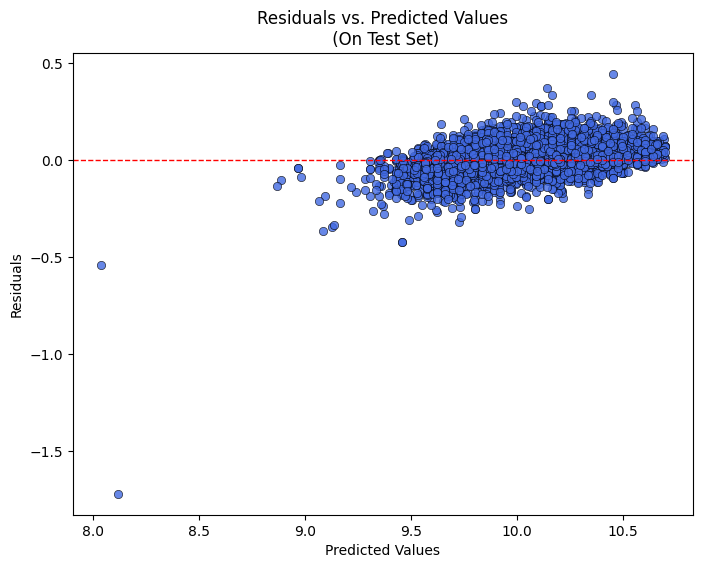

In [101]:
# plot residuals vs. predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_sc, y=resid_gb_2, color='royalblue', edgecolor='black', alpha=0.8)  # type: ignore
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values\n (On Test Set)")
plt.xlabel("Predicted Values")
plt.xticks(rotation=0)
plt.ylabel("Residuals")
plt.show()

<div style="font-family: 'Times New Roman', serif; w">

We can observe that the model has improved and heteroskedasticity is no longer present. 

Can we do better?

#### **Fine Tuning the Model: Leverage & Residuals Threshold**

We wil build a function that takes the influence_df as input and identify high leverage and high residual points. These points will be removed from the Train set with the constraint of high `Breusch-Pagan test p-value` and lower `MAE`.

</div>

In [102]:
def test_leverage_and_residuals_threshold(influence_df, threshold_leverage, threshold_residual):
    df_results = pd.DataFrame(columns=['high_leverage_threshold', 'high_residual_threshold', 'Breusch-Pagan test p-value', 'MAE', 'R2'])	
    
    for i in threshold_leverage:
        # append threshold_leverage to df_results
        for j in threshold_residual:  

            # append threshold_residual to df_results
            high_leverage_threshold = i
            high_residual_threshold = j

            # Identify high leverage and high residual points
            high_leverage_points = influence_df.cooks_d > high_leverage_threshold
            high_residual_points = np.abs(influence_df.standard_resid) > high_residual_threshold

            # Combine both conditions to find points with either high leverage or high residuals
            influential_points = high_leverage_points & high_residual_points 

            # Remove influential points from the Train set
            filtered_X_train = X_train[~influential_points]
            filtered_y_train = y_train[~influential_points]

            # Apply Box-Cox transformation to `price_usd` & `covered_surface_in_m2`
            X_train_sc = filtered_X_train.copy()
            y_train_sc = filtered_y_train.copy()

            X_test_sc = X_test.copy()
            y_test_sc = y_test.copy()

            best_lambda = test_lambda_df.lambda_value[0]
            X_train_sc.surface_covered_in_m2 = sps.boxcox(X_train_sc.surface_covered_in_m2, best_lambda)
            y_train_sc = sps.boxcox(y_train_sc, best_lambda)

            X_test_sc.surface_covered_in_m2 = sps.boxcox(X_test_sc.surface_covered_in_m2, best_lambda)
            y_test_sc = sps.boxcox(y_test_sc, best_lambda)

            # Scale Data
            std_scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

            X_train_sc = pd.DataFrame(std_scaler.fit_transform(X_train_sc), columns=X_train.columns, index=filtered_X_train.index)
            X_test_sc = pd.DataFrame(std_scaler.transform(X_test_sc), columns=X_test.columns, index=X_test.index)  # type: ignore

            # Fit the model on the filtered Train set and print summary
            model = GradientBoostingRegressor(n_estimators=1_000, random_state=42)

            fitted= model.fit(X_train_sc, y_train_sc) # type: ignore
            y_pred_gb= model.predict(X_test_sc)
            y_pred__gb_inv = inv_boxcox(y_pred_gb, best_lambda)

            # Calculate MAE for the test set
            mae_gb = mean_absolute_error(y_true=y_test, y_pred=y_pred__gb_inv)
            r2_gb= r2_score(y_true=y_test, y_pred=y_pred__gb_inv)

            resid_train = y_train_sc - fitted.predict(X_train_sc) 

            bp_test = het_breuschpagan(resid_train, sm.add_constant(X_train_sc))[1] # type: ignore

            new_row = pd.DataFrame({
                'high_leverage_threshold': i,
                'high_residual_threshold': j,
                'Breusch-Pagan test p-value': bp_test,
                'MAE': mae_gb,
                'R2': r2_gb}, index=[0]) # type: ignore
            df_results = pd.concat([df_results, new_row], ignore_index=True)

    return df_results.sort_values(by='MAE', ascending=True)

In [103]:
threshold_leverage = np.arange(0.0003, 0.0004, 0.00005)
threshold_residual = np.arange(3, 3.6, 0.5)

finale_results = test_leverage_and_residuals_threshold(influence_df, threshold_leverage, threshold_residual)

In [104]:
pd.options.display.float_format = '{:.4f}'.format
finale_results

high_leverage_threshold  high_residual_threshold  \
0                   0.0003                   3.0000   
2                   0.0003                   3.0000   
4                   0.0004                   3.0000   
1                   0.0003                   3.5000   
3                   0.0003                   3.5000   
5                   0.0004                   3.5000   

   Breusch-Pagan test p-value        MAE     R2  
0                      0.5640 23809.9879 0.7863  
2                      0.5640 23809.9879 0.7863  
4                      0.5640 23809.9879 0.7863  
1                      0.6252 24232.6477 0.7819  
3                      0.6252 24232.6477 0.7819  
5                      0.6252 24232.6477 0.7819

<div style="font-family: Times New Roman, serif;">

Our final result are: the best `high_leverage_threshold` is **0.0003** and the best `high_residual_threshold` is **3**. We will proceed with these two values as they will give us the best results, resulting in a MAE of **$23,809.9879** and an R2 of **0.7863**.

The best part is that we successfully handled the heteroskedasticity issue.

Next, we will store our pretrained model in a pickle file.

## **Store Model**

</div>

In [105]:
# Identify high leverage and high residual points
high_leverage_points = influence_df.cooks_d > 0.0003	
high_residual_points = np.abs(influence_df.standard_resid) > 3

# Combine both conditions to find points with either high leverage or high residuals
influential_points = high_leverage_points & high_residual_points 

# Remove influential points from the Train set
filtered_X_train = X_train[~influential_points]
filtered_y_train = y_train[~influential_points]

# Apply Box-Cox transformation to `price_usd` & `covered_surface_in_m2`
X_train_sc = filtered_X_train.copy()
y_train_sc = filtered_y_train.copy()

X_train_sc.surface_covered_in_m2 = sps.boxcox(X_train_sc.surface_covered_in_m2, best_lambda)
y_train_sc = pd.Series(sps.boxcox(y_train_sc, best_lambda), index=X_train_sc.index, name='price_aprox_usd')

# Scale Data
std_scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

X_train_sc = pd.DataFrame(std_scaler.fit_transform(X_train_sc), columns=X_train.columns, index=filtered_X_train.index)

# Fit the model on the filtered Train set and print summary
model = GradientBoostingRegressor(n_estimators=1_000, random_state=42)

fitted= model.fit(X_train_sc, y_train_sc) # type: ignore

In [106]:
# Store our model in a pickle file
import pickle

pickle.dump(fitted, open('final_model.pkl', 'wb'))
pickle.dump(std_scaler, open('standard_scaler.pkl', 'wb'))

In [107]:
# Load our model from the pickle file
model = pickle.load(open('final_model.pkl', 'rb'))
std_scaler = pickle.load(open('standard_scaler.pkl', 'rb'))

<div style="font-family: Times New Roman, serif;">

## **Deployment**

Our project is a Dash application that provides a real estate price prediction tool. It uses the Dash framework to create a web application with a user interface. The layout of the app is defined using HTML and CSS, and it includes various components such as input fields, buttons, and a map.

The app allows users to input the covered surface, latitude, and longitude of a property. When the user clicks the "Predict Price" button, the app retrieves the address based on the latitude and longitude using a function called `get_address()`. It then checks if the city is in Argentina and if it is in the Autonomous City of Buenos Aires. If not, it displays an error message.

If the city is valid, the app prepares a feature vector using the input values and performs a price prediction using a pre-trained model. The predicted price is then displayed on the app.

The app also includes a map component that allows users to click on a location to get the latitude and longitude coordinates. The coordinates are displayed on the app and can be used as input for the price prediction.

Additionally, the app provides information about the municipality where the property is located. It retrieves data from our data and displays statistics about the price distribution in that municipality.

The `get_address()` function retrieves the address based on the latitude and longitude using the `geopy` library.

</div>

In [108]:
from geopy.geocoders import Nominatim  # type: ignore

def get_address(latitude, longitude):
    geolocator = Nominatim(user_agent="coordinateconverter")
    try:
        location = geolocator.reverse((latitude, longitude), exactly_one=True, timeout=10, addressdetails=True, language='en', zoom=16)  # type: ignore
        return location.address  # type: ignore
    except:
        return "Not Found!"

# Example usage
latitude = -34.617768		
longitude = -58.566394	
address = get_address(latitude, longitude)
print(address)

651 - Domingo Faustino Sarmiento, Villa Pineral, Caseros, Partido de Tres de Febrero, Buenos Aires, 1678, Argentina


In [109]:
from dash import Dash, html, dcc, Input, Output, State, dash_table
from dash_extensions.javascript import assign
import dash_bootstrap_components as dbc
import dash_leaflet as dl

# Initialize the Dash app
app = Dash(__name__)

# JavaScript code to capture click event and set coordinates as property
eventHandlers = dict(
    click=assign("function(e, ctx){ctx.setProps({data: {lat: e.latlng.lat, lng: e.latlng.lng}})}")
)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
    ], style={'font-weight': 'bold', 'font-family':'Calibri','color':'#FD8916', 'background-color': '#17616E', 'width': '60%', 'padding':'1px','text-align': 'center',
              'margin': '0 auto', 'border': '0px solid white', 'border-radius': '10px', 'margin-bottom': '10px'}),

    html.Div([
        html.Div([
            html.Div([
                html.Div([
                    dcc.Input(id='covered_surface', type='number', placeholder='Surface Covered in m\u00b2',
                            style={'margin': '10px', 'padding': '10px', 'border-radius': '8px', 'border': '1px solid #FD8916'}),

                    dcc.Input(id='latitude', type='number', placeholder='Latitude',
                            style={'margin': '10px', 'padding': '10px', 'border-radius': '8px', 'border': '1px solid #FD8916'}),

                    dcc.Input(id='longitude', type='number', placeholder='Longitude',
                            style={'margin': '10px', 'padding': '10px', 'border-radius': '8px', 'border': '1px solid #FD8916'}),

                ], style={'width': '100%', 'border': '0px solid #007BFF', 'border-radius': '10px'}),

                # Define the button
                html.Div([
                    html.Button('Predict Price', id='predict_button', n_clicks=0,
                            style={'font-weight': 'bold', 'margin': '10px', 'padding': '10px', 'background-color': '#FD8916', 'color': '#173b61', 'border-radius': '8px',
                                   'border': '1px solid #173b61', 'float': 'right'}),
                ], style={'width': '100%', 'border': '0px solid #007BFF', 'border-radius': '10px', 'display': 'flex', 'justify-content': 'right'}),
            ], style={'border': '2px solid #17616E', 'border-radius': '10px'}),

            html.Div(id='prediction_output', style={'width': '100%', 'height': 'auto', 'margin-top': '10px','border': '2px solid #17616E', 'border-radius': '10px',
                                                'padding': '0px', 'display':'none'},
                    children=[
                        html.Div([
                            html.Div("Predicted Price:", style={'display': 'inline-block', 'font-weight': 'bold', 'font-family':'Calibri'}),
                            html.Div(id='predicted_price', style={'font-weight': 'bold', 'font-family':'Calibri', 'display': 'inline-block', 'margin-left': '20px',
                                                                  'color':'#FD8916'}),
                        ], style={'padding': '10px', 'margin-bottom': '10px'}),
                        html.Div([
                            html.Div("Apartment Address.:", style={'display': 'inline-block', 'font-weight': 'bold', 'font-family':'Calibri'}),
                            html.Div(id='address', style={'font-weight': 'bold', 'font-family':'Calibri', 'color': '#17616E', 'display': 'inline-block',
                                                          'margin-left': '10px'}),
                        ], style={'padding': '10px', 'margin-bottom': '10px'}),
                        html.Div([
                            html.Div("Municipality Statistics:", style={'display': 'inline-block', 'font-weight': 'bold', 'font-family':'Calibri'}),
                            html.Div(id='municipality_name', style={'font-weight': 'bold', 'font-family':'Calibri','color':'#FD8916', 'margin': '5px',
                                                                    'display': 'flex', 'justify-content': 'center'}),
                            html.Div(id='municipality_info', style={'font-weight': 'bold', 'font-family':'Calibri', 'color': '#17616E', 'margin': '10px',
                                                                    'display': 'flex', 'justify-content': 'center'}),
                        ], style={'padding': '10px', 'margin-bottom': '10px'}),
                    ]
            ),
        ], style={'width': '40%', 'padding': '20px', 'border': '2px solid #17616E', 'border-radius': '10px', 'margin-right': '10px', 'background-color': 'white'}),
        
        html.Div([
            dl.Map(
                children=[
                    dl.TileLayer(),
                    dl.Marker(id='marker', position=[33.6086, -7.6327])],
                eventHandlers=eventHandlers,
                style={'height': '60vh', 'width': '100%'},  # Set height to 80% of the viewport height
                center=[-34.6037, -58.3816],  # Center around Buenos Aires
                zoom=12,  # Set zoom level to view the city
                id='map'
            ),
            html.Div(id='coordinates', style={'marginTop': '20px', 'font-weight': 'bold', 'font-family':'Calibri', 'fontSize': '20px', 'color': 'black',
                                              'backgroundColor': 'white', 'border-radius': '10px', 'padding': '10px', 'text-align': 'center'})
        ], style={'width': '60%', 'padding': '20px', 'border': '0px solid #FAF3DD', 'border-radius': '10px', 'background-color': '#173b61'}
        ),
    ], style={'display': 'flex', 'justify-content': 'space-between'})
], style={'background-color': 'white', 'max-width': '1200px', 'margin': '0 auto', 'backgroundColor': '#FFEBD0', 'padding': '20px', 'border': '2px solid #17616E',
          'border-radius': '10px'})

In [110]:
# Define the callback to show the prediction output when the button is clicked
@app.callback(
    Output('prediction_output', 'style'),
    Input('predict_button', 'n_clicks'),
    prevent_initial_call=False 
)
def show_prediction_output(n_clicks):
    if n_clicks > 0:
        return {'display': 'block', 'width': '100%', 'height': 'auto', 'margin-top': '10px', 'border': '2px solid #17616E', 'border-radius': '10px', 'padding': '0px'}
    return {'display': 'none'}

# Callback to update coordinates based on map click
@app.callback(
    [Output('latitude', 'value'),
     Output('longitude', 'value'),
     Output('coordinates', 'children'),
     Output('marker', 'position')],
    Input('map', 'data')
)
def update_coordinates(data):
    if data:
        return data['lat'], data['lng'], f"Coordinates: Latitude {data['lat']:.4f}, Longitude {data['lng']:.4f}", [data['lat'], data['lng']]
    return None, None, "Click on the map to get coordinates", [33.6086, -7.6327]

# Separate callback to update address
@app.callback(
    Output('address', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_address(n_clicks, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [latitude, longitude]):
        # Get address
        address = get_address(latitude, longitude)
        return address
    return ''

# Separate callback to update predicted price
@app.callback(
    Output('predicted_price', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('covered_surface', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_predicted_price(n_clicks, covered_surface, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [covered_surface, latitude, longitude]):

        # check if city is in Argentina by using the get_address function
        try:
            city = [element.strip() for element in get_address(latitude, longitude).split(",")][-3]
        except:
            return 'So you want to buy an apartment in the sea... Very funny 😄'

        if city != 'Autonomous City of Buenos Aires':
            return '❌ The city is not in the Autonomous City of Buenos Aires! Please select another location.'

        # Prepare the feature vector
        features = pd.DataFrame([[latitude, longitude, covered_surface]],  
                                columns=['latitude', 'longitude', 'surface_covered_in_m2'])

        # Transform the feature `surface_covered_in_m2` using the 'box-cox' transformation
        features.surface_covered_in_m2 = sps.boxcox(features.surface_covered_in_m2, best_lambda)

        # Scale the feature vector
        features_scaled = std_scaler.transform(features)      
        features_df = pd.DataFrame(features_scaled, columns=features.columns)  # type: ignore

        # Predict Apartment Price 
        prediction = model.predict(features_df)

        # Inverse Box-Cox transformation
        prediction_orginal_scale = inv_boxcox(prediction, best_lambda)[0]

        # Return the predicted price
        return f'${prediction_orginal_scale:,.0f}'
    return ''

# Separate callback to update municipality information
@app.callback(
    [Output('municipality_name', 'children'),
    Output('municipality_info', 'children')],
    [Input('predict_button', 'n_clicks')],
    [State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_municipality_info(n_clicks, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [latitude, longitude]):
        try:
            # Get address
            address = get_address(latitude, longitude)

            # Filter data by municipality
            municipality = [element.strip().lower() for element in address.split(",")]
            info_municipality = df_full[(df_full.municipality.str.lower().str.contains(municipality[1]))
                                        | (df_full.municipality.str.lower().str.contains(municipality[2]))
                                        | (df_full.municipality.str.lower().str.contains(municipality[3]))
            ]
        except Exception:
            return '', f"🔱 Poseidon has put up a ‘No Humans Allowed’ sign for the sea apartments. Apparently, he's not into ocean-side neighbors who don't appreciate underwater real estate!"
        
        if info_municipality.shape[0] == 0:
            return '', f"🤷🏻‍♂️ It seems that we do not have any information about this location"
        else:
            # Extract municipality name
            municipality_name = info_municipality.municipality.unique()[0]

            # Create table
            municipality_df = pd.DataFrame(info_municipality.price_aprox_usd.describe())[1:]  # Exclude 'count'

            # Create 'Measure' column
            municipality_df['Measure'] = 0

            # Order columns & rename `price_usd` to `Value`
            municipality_df = municipality_df[['Measure', 'price_aprox_usd']].rename(columns={'price_aprox_usd': 'Value'})  # type: ignore 

            # Format table
            municipality_df.Value = municipality_df.Value.apply(lambda x: f"${x:,.0f}" if isinstance(x, (int, float)) else x)  # type: ignore

            # Rename rows to proper headings
            municipality_df['Measure'] = ['Average Price (USD)', 'Price Standard Deviation (USD)', 'Minimum Price (USD)', '25th Percentile Price (USD)', 
                                    'Median Price (USD)', '75th Percentile Price (USD)','Maximum Price (USD)']

            # Return the table
        
            return municipality_name, dash_table.DataTable(
                municipality_df.to_dict('records'),[{'name': 'Measure', 'id': 'Measure'}, {'name': 'Value', 'id': 'Value'}],
                style_cell={'textAlign': 'left', 'font-family': 'Calibri', 'padding': '10px', 'border': '1px solid #17616E'},
                style_header={'backgroundColor': '#17616E', 'color': 'white', 'fontWeight': 'bold', 'textAlign': 'center'},
                style_table={'width': '100%', 'margin': '0 auto'}
                )
        
    return '', html.Div('')

In [111]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8030)

# Open http://127.0.0.1:8050/

<div style="width: 90%; font-family: Times New Roman, serif; text-justify: inter-word; margin: 0 auto; font-size: 20px;">

## **Conclusion**

In conclusion, our project **successfully** addressed key challenges in predicting real estate prices by effectively handling **heteroskedasticity** and optimizing model performance. Through rigorous analysis, we determined that the optimal `high_leverage_threshold` is **0.0003** and the best `high_residual_threshold` is **3**. Adopting these thresholds led to significant improvements in our model, achieving a **Mean Absolute Error (MAE)** of ***$23,809.9879*** and an **R²** of ***0.7863***.

Notably, we surpassed the baseline MAE by **60%**, demonstrating the effectiveness of our approach. Extensive **feature engineering** and the application of advanced techniques enabled us to identify and address outliers and influential points, ultimately refining our model.

Our iterative process involved experimenting with various versions of the **Ordinary Least Squares (OLS)** model, each iteration contributing to the overall enhancement of model performance. The final choice of a **gradient boosting** model was informed by its superior performance and ability to address heteroskedasticity, ensuring the most accurate predictions and robust results.

Overall, our approach and methodology provided a well-rounded solution to the complexities of real estate price prediction, showcasing our **capability** to leverage data science techniques to drive impactful insights.

</div>

<div style="width: 90%; font-family: Times New Roman, serif; text-justify: inter-word; margin: 0 auto; font-size: 20px;">

## **References**


1. **Data Sources**:
   - [Buenos Aires Real Estate Data]. (2016). Retrieved from [Properati.com](https://properati.com/)

2. **Technical Papers and Articles**:
   - Christian Thieme. (2021). Identifying Outliers in Linear Regression — Cook’s Distance. [Medium.com](https://towardsdatascience.com/identifying-outliers-in-linear-regression-cooks-distance-9e212e9136a).
   - Eric Hansen. (2021). Linear Regression and Assumption Validity.[Medium.com](https://ericthansen.medium.com/linear-regression-and-assumption-validity-94712f714ea4).
   - Hitesh Taneja. (2023). In-Depth Guide to Cook’s Distance. [Medium.com](https://medium.com/@hiteshtaneja/in-depth-guide-to-cooks-distance-40697cda2c9d).

3. **Books and Tutorials**:
   - Aman Kharwal. (2023). Build An End-to-End Machine Learning Model. [thecleverprogrammer.com](https://thecleverprogrammer.com/2023/1218build-an-end-to-end-machine-learning-model/).

4. **Official Documentations**:
   - Events. [dash-leaflet.com](https://www.dash-leaflet.com/docs/events)
   - Dash DataTable. [Dash.Plotly.com](https://dash.plotly.com/datatable)
   - Performance. [Dash.Plotly.com](https://dash.plotly.com/performance)


5. **Libraries and Tools**:
   - Scikit-learn.
   - Statsmodels.
   - Pandas.
   - NumPy.
   - Matplotlib.
   - Seaborn.
   - Plotly.
   - Dash.

## **About the Author**

**Youssef Laouina** is a certified data scientist with expertise in Python, machine learning, and data analysis. He has a background in economics and has worked on projects addressing real-world problems through data-driven solutions.

Connect with Youssef:
- **Email**: [laouina.yusuf@gmail.com](mailto:laouina.yusuf@gmail.com)
- **LinkedIn**: [Youssef Laouina](https://www.linkedin.com/in/youssef-laouina)
- **GitHub**: [Youssef Laouina](https://github.com/youssef-laouina)

   </div>
